# **0 - Group introduction**

**Group Number:** 4
<br>
**Team Member:** , Kumar Manav,Sathvika Pathuri, Tingzhi Song
<br>







# **1 - Data Prep and EDA (10 pts)**

###**Step 1: Import and install all of useful modules or packages.**

In [ ]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

In [ ]:
# helpful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import shutil, sys
import os
!pip install pyomo
from pyomo.environ import *
import datetime # handling dates
import time # handling times
from dateutil.relativedelta import relativedelta # time difference
from matplotlib.pyplot import figure

In [ ]:
ipopt_executable = '/content/bin/ipopt' # using the IPOPT Solver.

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=e07f235948416aec0c3a81fdaa9571f38acdfe2b3a6e49edfe0873e0aabfff49
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


###**Step 2: Start to prepare our data.**

In [ ]:
# List of selected stock ticker symbols for the consumer staples sector
consumer_staples_tickers = ['COST', 'DLTR', 'HSY', 'PEP', 'SYY', 'WMT', 'PM', 'TAP', 'LW', 'MKC']
# Using dictionary  to loop through each ticker symbol in the consumer staples list
# For each ticker, retrieve its daily stock price data for the specified date range
consumer_staples_prices = {ticker: si.get_data(ticker, start_date='01/01/2017', end_date='12/31/2022', interval='1d') for ticker in consumer_staples_tickers}

In [ ]:
consumer_staples_prices

{'COST':                   open        high         low       close    adjclose  \
 2017-01-03  160.649994  160.990005  158.509995  159.729996  137.252991   
 2017-01-04  159.800003  160.490005  158.940002  159.759995  137.278778   
 2017-01-05  160.949997  163.350006  160.630005  162.910004  139.985535   
 2017-01-06  162.669998  162.949997  161.130005  162.830002  139.916809   
 2017-01-09  162.330002  162.479996  160.720001  160.970001  138.318512   
 ...                ...         ...         ...         ...         ...   
 2022-12-23  457.519989  463.179993  454.799988  462.649994  448.304230   
 2022-12-27  464.399994  464.700012  457.109985  458.500000  444.282928   
 2022-12-28  457.540009  460.459991  452.799988  452.989990  438.943756   
 2022-12-29  455.630005  459.000000  453.459991  456.529999  442.374023   
 2022-12-30  454.649994  456.700012  450.750000  456.500000  442.344971   
 
              volume ticker  
 2017-01-03  2099000   COST  
 2017-01-04  2163600   COST  


In [ ]:
# List of selected stock ticker symbols for the energy sector
energy_tickers = ['WMB', 'VLO', 'EQT', 'XOM', 'HAL', 'HES', 'MRO', 'KMI', 'MPC', 'PSX']
# Using dictionary  to loop through each ticker symbol in the energy list
# For each ticker, retrieve its daily stock price data for the specified date range
energy_prices = {ticker: si.get_data(ticker, start_date='01/01/2017', end_date='12/31/2022', interval='1d') for ticker in energy_tickers}

In [ ]:
# List of selected stock ticker symbols for the financial sector
financials_tickers = ['AXP', 'BAC', 'BX', 'COF', 'C', 'CFG', 'DFS', 'GS', 'VZ', 'AIG']
# Using dictionary  to loop through each ticker symbol in the financial list
# For each ticker, retrieve its daily stock price data for the specified date range
financials_prices = {ticker: si.get_data(ticker, start_date='01/01/2017', end_date='12/31/2022', interval='1d') for ticker in financials_tickers}

In [ ]:
from yahoo_fin import stock_info as si

def get_stock_data(tickers, start_date, end_date):
    # Initialize an empty dictionary to store the price data
    prices = {}

    # Loop through each ticker and get the data
    for ticker in tickers:
        prices[ticker] = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')['adjclose']

    # Convert the dictionary to a DataFrame
    price_data = pd.DataFrame(prices)

    return price_data

# Set the date range
start_date = '01/01/2017'
end_date = '12/31/2022'

# Get the stock data for each sector
energy_data = get_stock_data(energy_tickers, start_date, end_date)
consumer_staples_data = get_stock_data(consumer_staples_tickers, start_date, end_date)
financials_data = get_stock_data(financials_tickers, start_date, end_date)

# Print the data for each sector
print(energy_data)
print(consumer_staples_data)
print(financials_data)


                  WMB         VLO        EQT         XOM        HAL  \
2017-01-03  20.751867   51.803146  32.950050   64.500008  48.846737   
2017-01-04  20.685904   49.942005  33.526047   63.790344  49.030949   
2017-01-05  20.936556   49.787521  33.870602   62.839417  49.311687   
2017-01-06  21.385107   49.037182  33.598030   62.803955  49.706459   
2017-01-09  21.061890   48.823845  32.487190   61.767868  49.188873   
...               ...         ...        ...         ...        ...   
2022-12-23  31.123585  119.482765  35.448296  104.124245  38.210915   
2022-12-27  31.207651  121.442604  35.575562  105.570953  38.386864   
2022-12-28  30.563135  120.424263  32.795303  103.836830  37.223625   
2022-12-29  30.796658  121.356140  33.157520  104.622444  37.995850   
2022-12-30  30.731272  121.874916  33.118362  105.676346  38.465065   

                   HES        MRO        KMI         MPC        PSX  
2017-01-03   55.672272  16.112362  14.593072   41.570549  65.380424  
2017-01

###**step 3: Handling Missing values**

In [ ]:
# Check for missing values in each sector's data
# Consumer sector
print("Missing values in Consumer Staples sector:")
print(consumer_staples_data.isnull().sum())
# Energy sector
print("\nMissing values in Energy sector:")
print(energy_data.isnull().sum())
# financials sector
print("\nMissing values in Financials sector:")
print(financials_data.isnull().sum())

Missing values in Consumer Staples sector:
COST    0
DLTR    0
HSY     0
PEP     0
SYY     0
WMT     0
PM      0
TAP     0
LW      0
MKC     0
dtype: int64

Missing values in Energy sector:
WMB    0
VLO    0
EQT    0
XOM    0
HAL    0
HES    0
MRO    0
KMI    0
MPC    0
PSX    0
dtype: int64

Missing values in Financials sector:
AXP    0
BAC    0
BX     0
COF    0
C      0
CFG    0
DFS    0
GS     0
VZ     0
AIG    0
dtype: int64


Great! There is no missing values in these three sectors.

###**Step 4: Detecting and Handling Outliers**

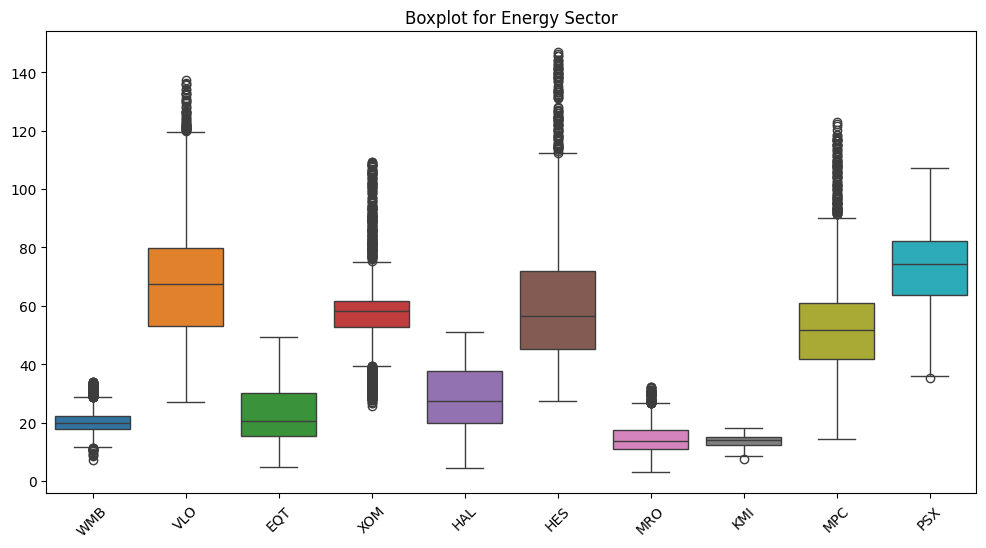

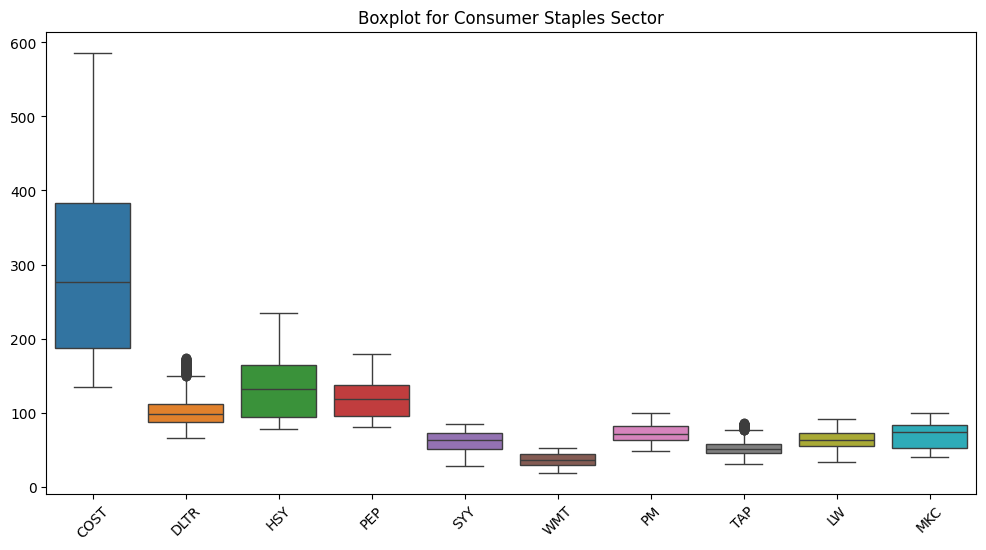

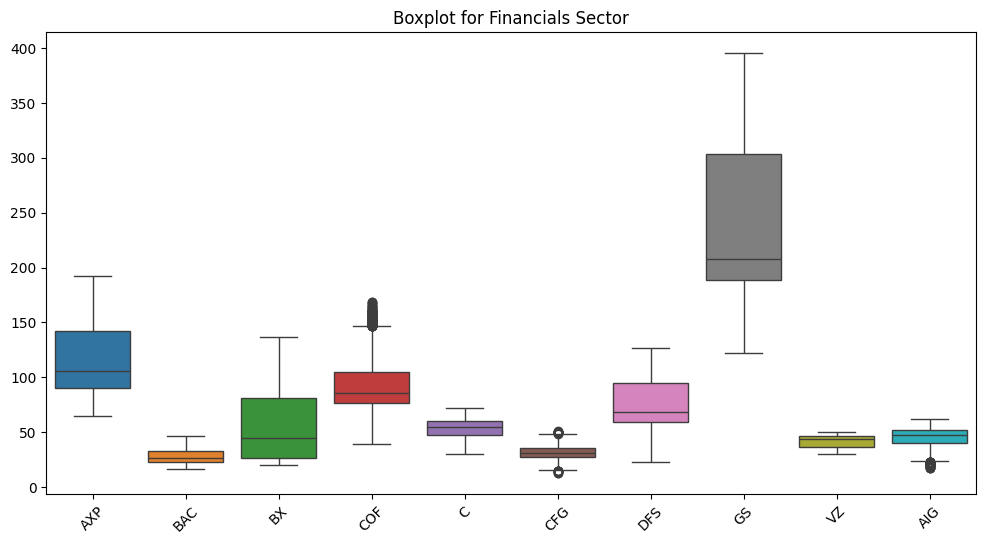

In [ ]:
# Detect Outliers
# Outliers can significantly affect the results of our analysis and the performance of models.

def plot_boxplot(data, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plot the boxplot for energy sector
plot_boxplot(energy_data, "Boxplot for Energy Sector")

# Plot the boxplot for consumer staples sector
plot_boxplot(consumer_staples_data, "Boxplot for Consumer Staples Sector")

# Plot the boxplot for financials sector
plot_boxplot(financials_data, "Boxplot for Financials Sector")

Let's analyze these boxplots in each sector.

<br>

**Energy Sector Boxplot Analysis**

*   Diversity: The boxplots show a wide range of distributions for stock prices, indicating significant variability in the Energy sector.
*   Median Prices: There's a noticeable variation in the median prices across different stocks, suggesting substantial differences in valuation.
*   Outliers: There are numerous outliers, especially for XOM, where data points lie significantly above the upper whisker or below the lower whisker, which could indicate specific events or volatility that may warrant further investigation.

<br>

**Consumer Staples Sector Boxplot Analysis**
*   Stability: Compared to the Energy sector, the boxplots for the Consumer Staples sector suggest more stability with a less spread out interquartile range, indicating less volatility in stock prices.
*   High-Value Stocks: COST exhibits a higher median and overall price range, indicating it is priced higher than others in the sector.
*   Outliers: DLTR shows several outliers, which may need further investigation to determine if they result from data errors or specific events that caused the price to fluctuate.


<br>

**Financials Sector Boxplot Analysis**
*   Price Distribution: The boxplot indicates a more uniform distribution of stock prices without extremely high or low values.
*   Proximity of Medians: Most stocks have close medians, indicating less variation in stock prices within the Financials sector.
*   Outliers: GS has several notably high values, which could be due to specific events or market fluctuations that affected the stock price.

<br>

**Summary**
*   Price Variation: There is a significant variation in median stock prices across the three sectors, which may reflect the different characteristics and market performance of the sectors.
*   Sector Stability: The Consumer Staples sector appears to be more stable in terms of median prices and quartiles compared to the Energy and Financials sectors.
*   Further Data Analysis: Given our limited financial knowledge, we are unable to determine the cause of these outliers; therefore, we have decided not to address these outliters.

###**Step 5: Checking Data Consistency**

In [ ]:
# Check for Data Consistency
def check_negative_values(data, sector_name):
    if (data < 0).any().any():
        print(f"Warning: Negative values detected in {sector_name} sector.")
    else:
        print(f"No negative values in {sector_name} sector.")

# Check for three sectors
check_negative_values(energy_data, "Energy")
check_negative_values(consumer_staples_data, "Consumer Staples")
check_negative_values(financials_data, "Financials")

No negative values in Energy sector.
No negative values in Consumer Staples sector.
No negative values in Financials sector.


Nice! There is also no negative values.

In [ ]:
# Show the part of energy data
energy_data.head()

WMB        VLO        EQT        XOM        HAL        HES  \
2017-01-03  20.751867  51.803146  32.950050  64.500008  48.846737  55.672272   
2017-01-04  20.685904  49.942005  33.526047  63.790344  49.030949  54.883526   
2017-01-05  20.936556  49.787521  33.870602  62.839417  49.311687  55.034180   
2017-01-06  21.385107  49.037182  33.598030  62.803955  49.706459  54.856937   
2017-01-09  21.061890  48.823845  32.487190  61.767868  49.188873  53.713726   

                  MRO        KMI        MPC        PSX  
2017-01-03  16.112362  14.593072  41.570549  65.380424  
2017-01-04  16.375454  14.667353  40.243244  65.734497  
2017-01-05  16.493397  14.647095  40.094017  65.342751  
2017-01-06  16.221224  14.728127  39.559952  64.333313  
2017-01-09  15.785759  14.613327  38.845249  63.293755

In [ ]:
# Show the part of consumer staples data
consumer_staples_data.head()

COST       DLTR        HSY        PEP        SYY        WMT  \
2017-01-03  137.252960  77.449997  88.577820  84.886040  45.532867  19.986479   
2017-01-04  137.278793  79.449997  88.748260  85.048286  45.949306  20.102924   
2017-01-05  139.985504  78.059998  88.177177  84.934715  45.799389  20.146582   
2017-01-06  139.916748  77.089996  89.080704  84.813042  46.124207  19.870043   
2017-01-09  138.318512  77.139999  88.552231  83.920799  46.374054  20.001040   

                   PM        TAP         LW        MKC  
2017-01-03  62.099247  82.636940  34.079865  41.255131  
2017-01-04  61.547878  83.928673  33.616238  41.136097  
2017-01-05  62.031181  84.156639  33.289001  40.329426  
2017-01-06  62.514473  84.249481  33.479897  40.289757  
2017-01-09  62.153709  82.974648  33.534439  39.734337

In [ ]:
# Show the part of financials data
financials_data.head()

AXP        BAC         BX        COF          C        CFG  \
2017-01-03  67.625473  19.148518  19.858620  77.839790  48.232990  27.094496   
2017-01-04  68.734070  19.505478  21.045053  79.092300  48.885765  27.328720   
2017-01-05  67.886864  19.276003  21.482897  77.410591  48.033978  26.988726   
2017-01-06  68.022041  19.276003  21.546461  77.603264  48.201149  27.132277   
2017-01-09  68.373558  19.165512  21.518209  76.587265  47.938461  26.958498   

                  DFS          GS         VZ        AIG  
2017-01-03  61.684116  207.482681  37.348454  53.816307  
2017-01-04  62.710335  208.822571  37.307404  54.518757  
2017-01-05  61.828300  207.267975  37.389523  54.212994  
2017-01-06  61.115875  210.342819  36.834850  55.212959  
2017-01-09  60.742687  208.616455  36.433716  54.857594

###**step 6:Time-series visulization for each sector**

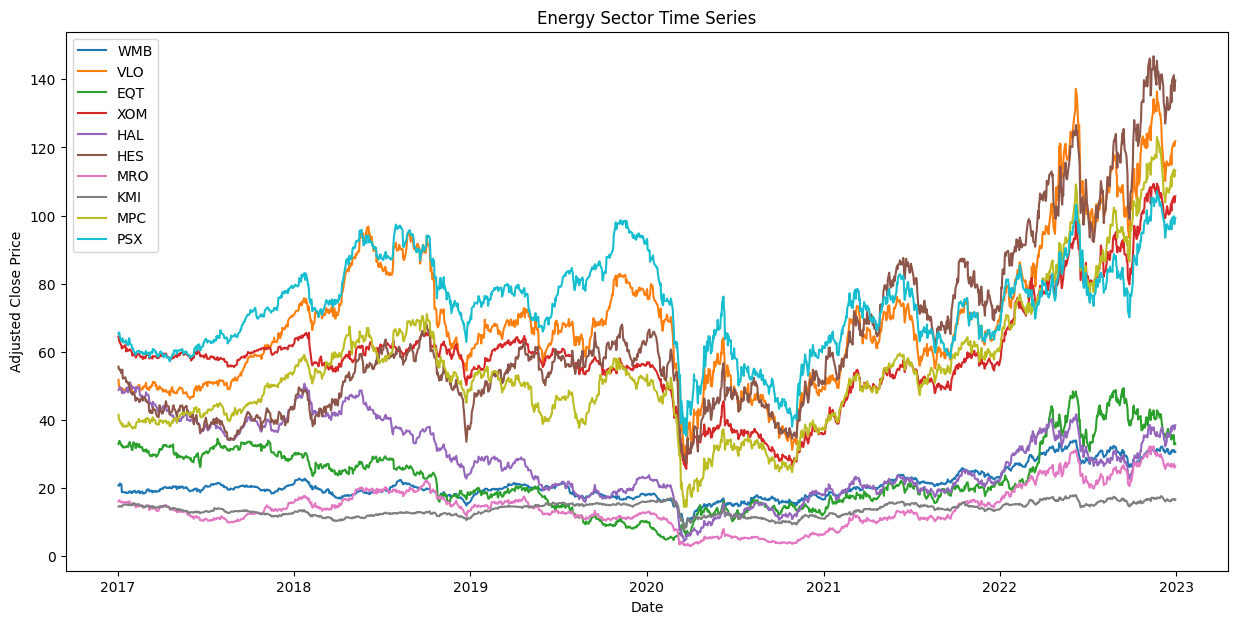

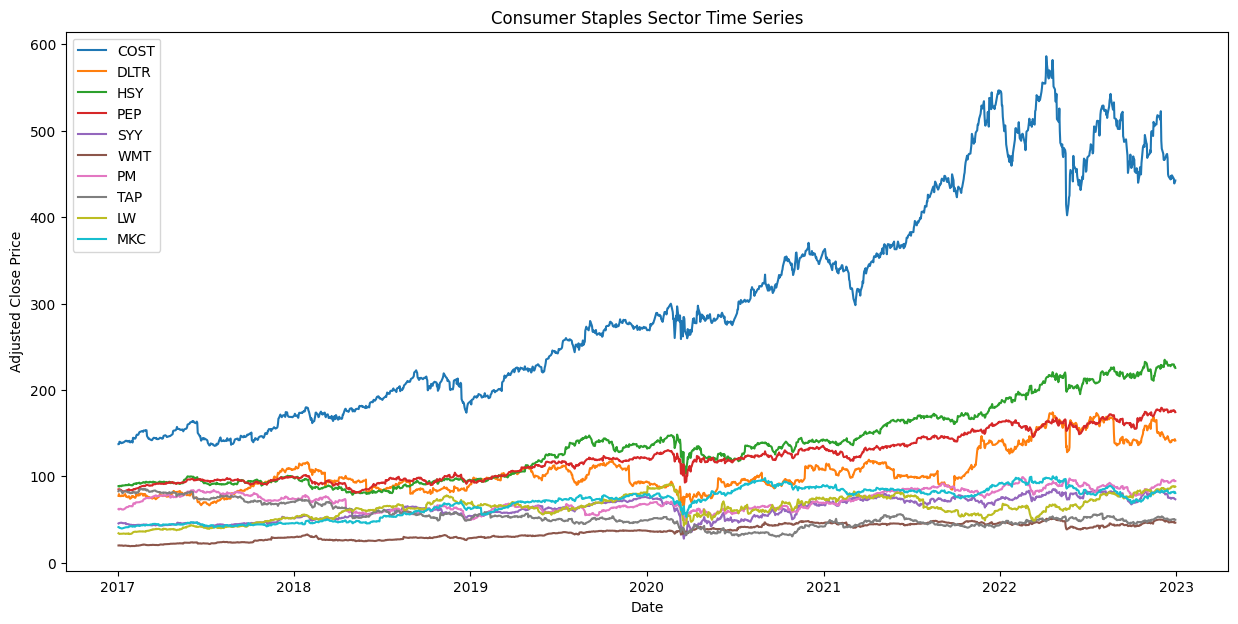

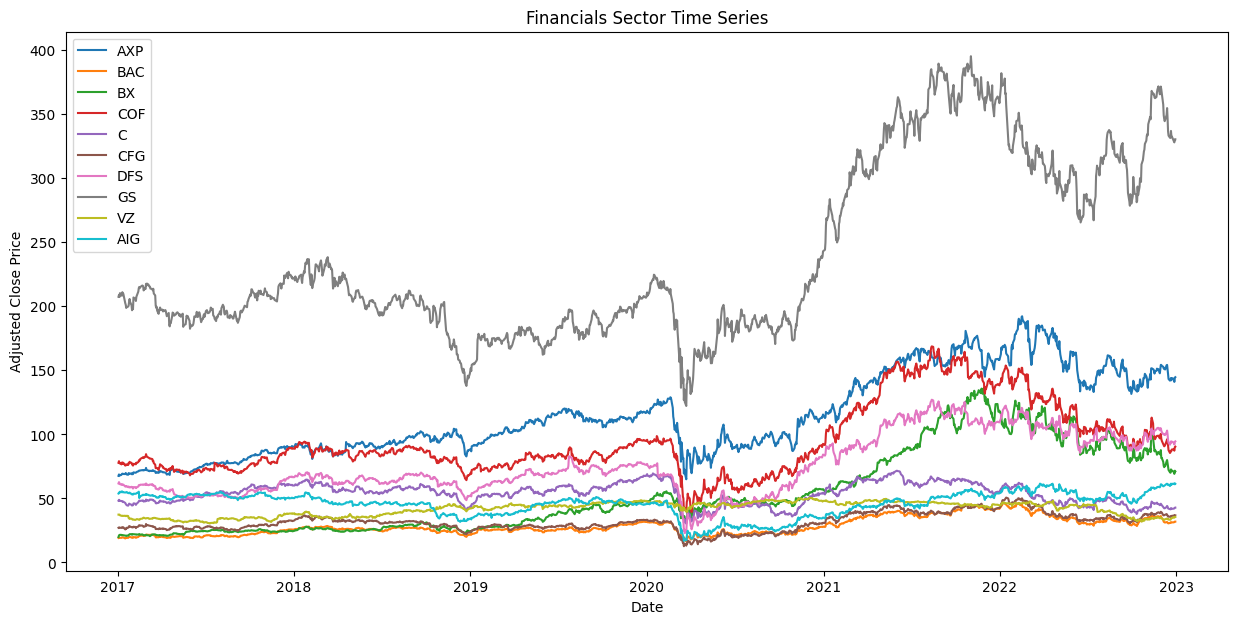

In [ ]:
# Function to plot time series data
def plot_time_series(data, sector_name):
    plt.figure(figsize=(15, 7))
    for column in data.columns:
        plt.plot(data.index, data[column], label=column)
    plt.title(f'{sector_name} Sector Time Series')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()

# Plotting time series data for each sector
plot_time_series(energy_data, 'Energy')
plot_time_series(consumer_staples_data, 'Consumer Staples')
plot_time_series(financials_data, 'Financials')


Let's analyze visualization of each sector

**Energy Sector Time Series Analysis:**



1. **Volatile Periods:** There are periods where all stocks show significant movement, such as the sharp downturn observed in early 2020, which likely corresponds to the global economic impact of the COVID-19 pandemic. The subsequent recovery varies by stock, indicating different recovery speeds.
2. **Overall Trends:** Post-2020, a general upward trend can be observed, although with noticeable dips. These could be in response to varying oil prices or sector-specific events.
3.**Divergent Behaviors:** Some stocks (e.g., PSX, VLO) are displaying a stronger recovery and upward momentum compared to others (e.g., XOM, WMB), suggesting differences in company performance or strategy.
4.**Sector Resilience:** Despite the volatility, the sector shows resilience, with most stocks recovering to pre-pandemic levels or higher, indicating a possible strong demand for energy and a recovery in oil prices.

**Consumer Staples Sector Time Series Analysis:**


1.   **Steady Growth:** A stock represented by the blue line (COST) shows a robust and steady growth until 2022, which is typical for the consumer staples sector as these goods are in constant demand.
2.   **Stability:** This sector is less volatile compared to the Energy sector, which aligns with the defensive nature of consumer staples stocks—products that remain in demand regardless of economic conditions.

3.   **Dip in 2020:** There's a visible dip in early 2020 across all stocks, again likely due to the COVID-19 pandemic, but the recovery is swift, reflecting the essential nature of consumer staples.
4.  **Varied Performance:** While one stock significantly outperforms others, the rest show moderate growth with some fluctuations, possibly influenced by specific company events or market share changes.

**Financials Sector Time Series Analysis:**


1.   **Sharp Fluctuations:** Like the Energy sector, there is volatility visible, particularly around 2020, reflecting the financial market's response to economic uncertainty during the pandemic.
2.  **Post-Pandemic Recovery:** The recovery after 2020 is notable, with some stocks (e.g., the one represented by the grey line, GS) achieving significant growth. This could be due to an improved economic outlook, rising interest rates, or other sector-specific catalysts.
3.   **Decline in Late 2022:** There seems to be a sector-wide decline starting in late 2022. This could be due to various factors, including market anticipation of economic downturns, policy changes, or reduced consumer spending affecting financial institutions.
4.   **Performance Disparity:** There is a wide disparity in performance among the stocks, suggesting varying strategic successes, exposure to market risks, and possibly different customer bases.

Each sector reflects its inherent characteristics: the Energy sector's susceptibility to external shocks, the Consumer Staples sector's relative stability, and the Financials sector's sensitivity to economic cycles. These insights set the stage for deeper analysis into the factors driving each sector's performance.







# **2 - Momentum Trading for Stock Selection (20 pts)**

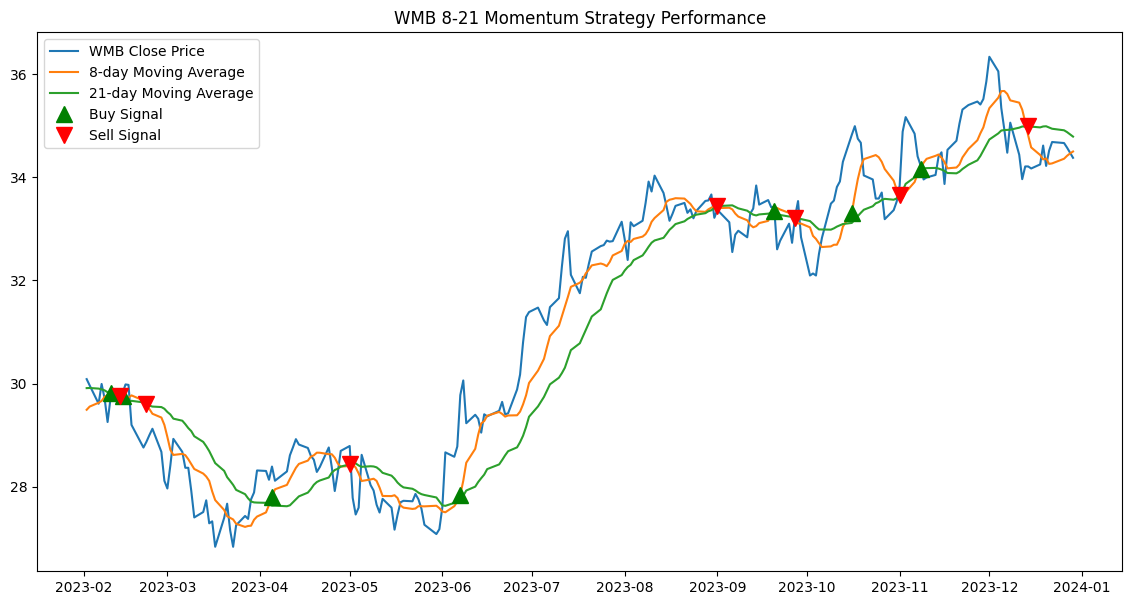

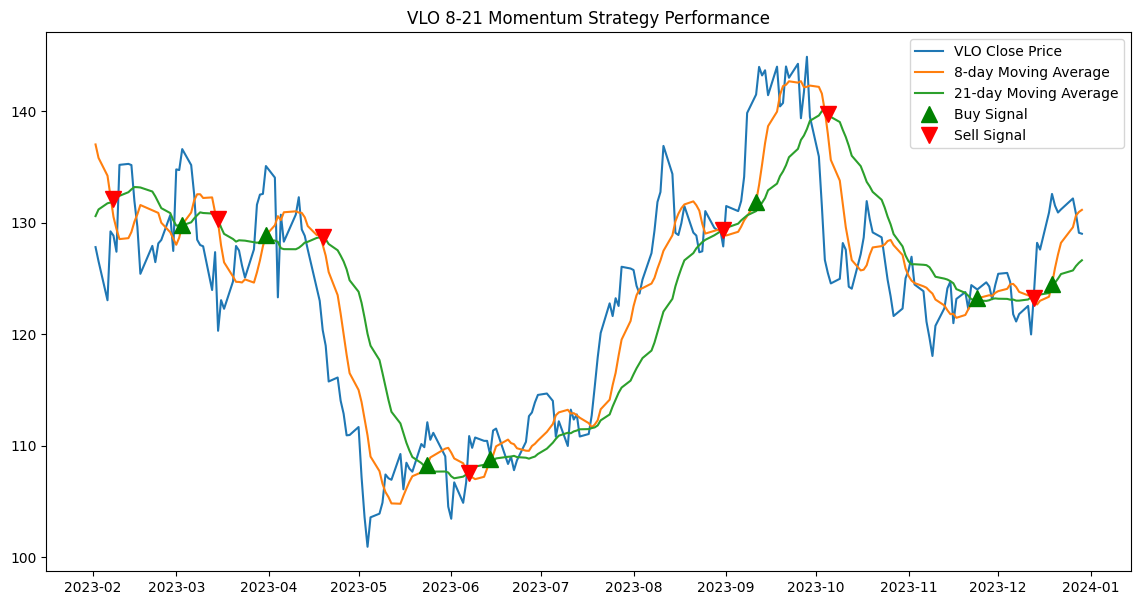

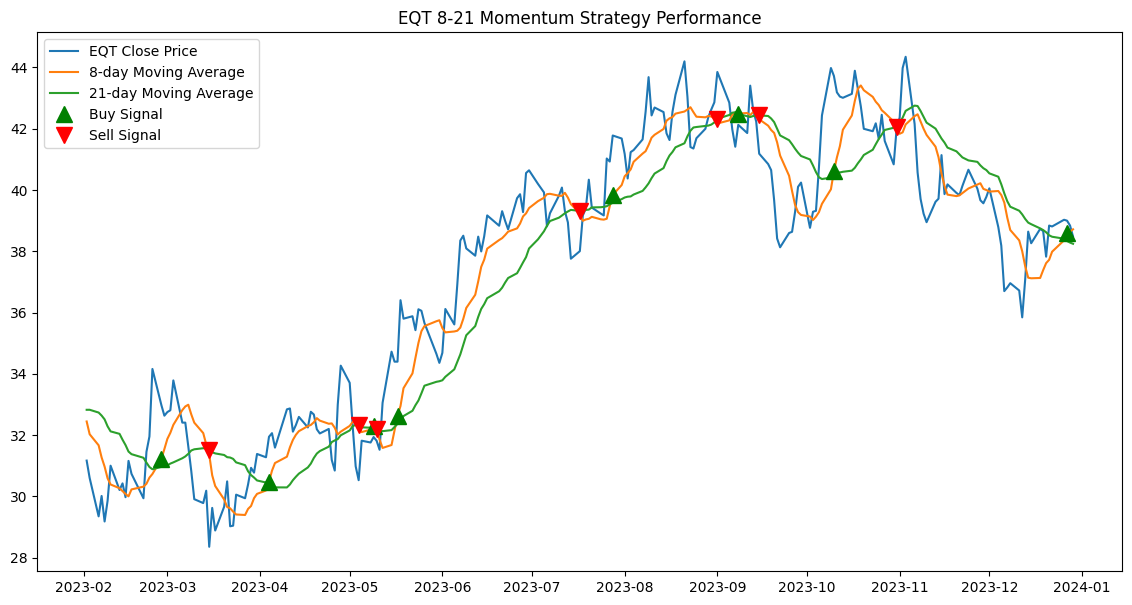

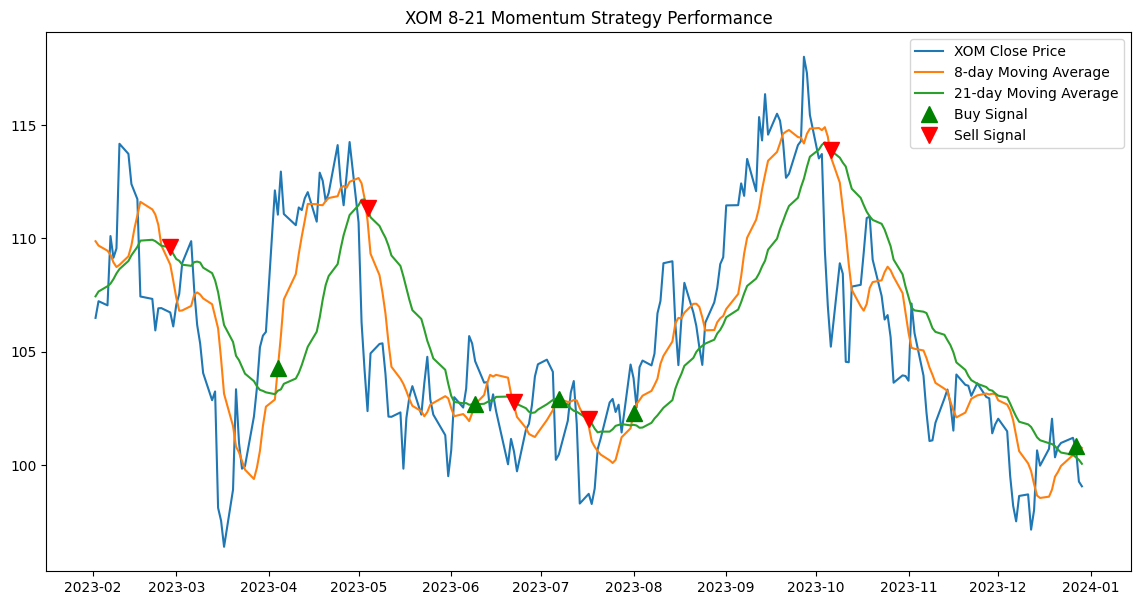

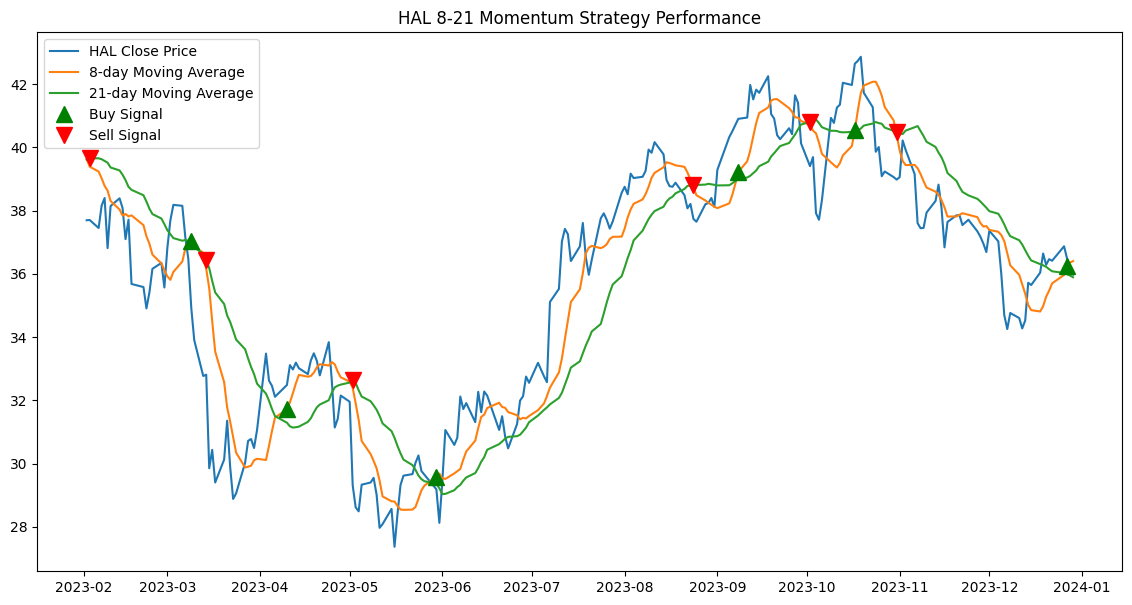

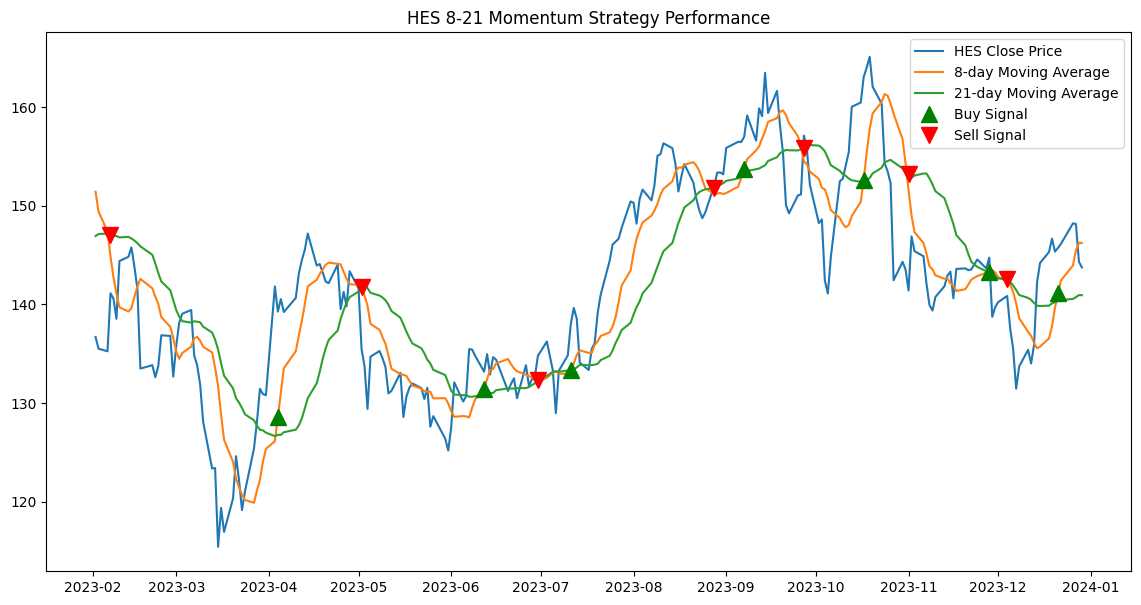

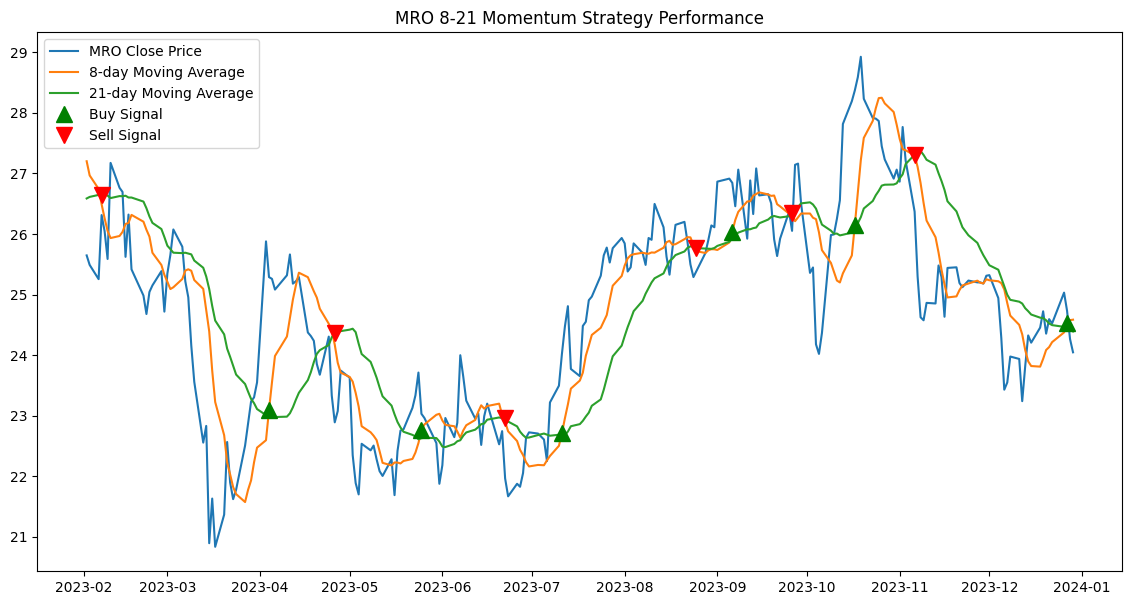

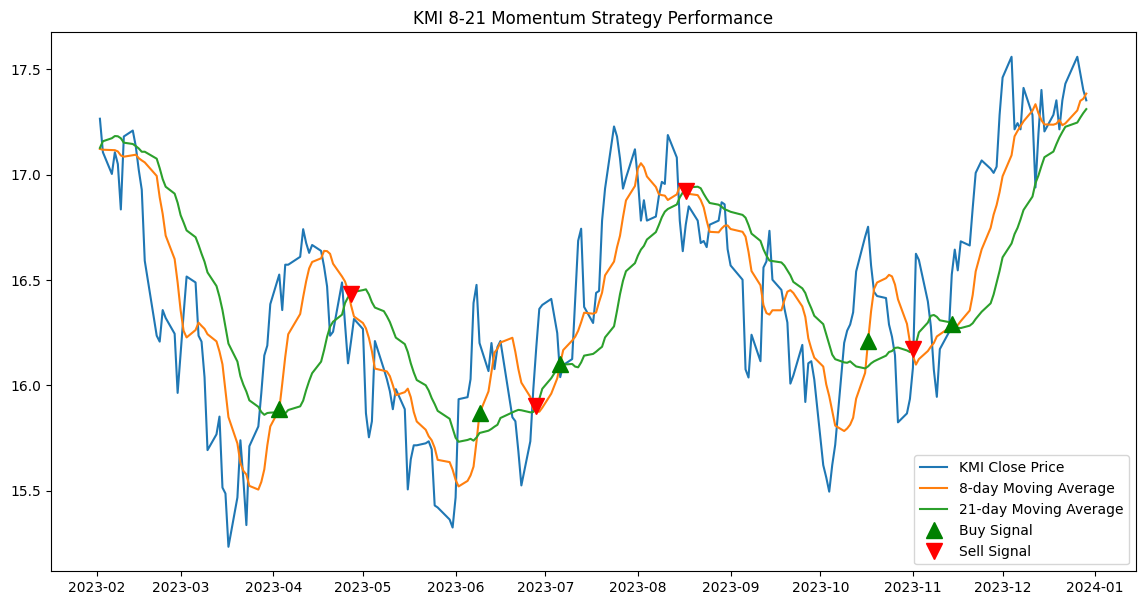

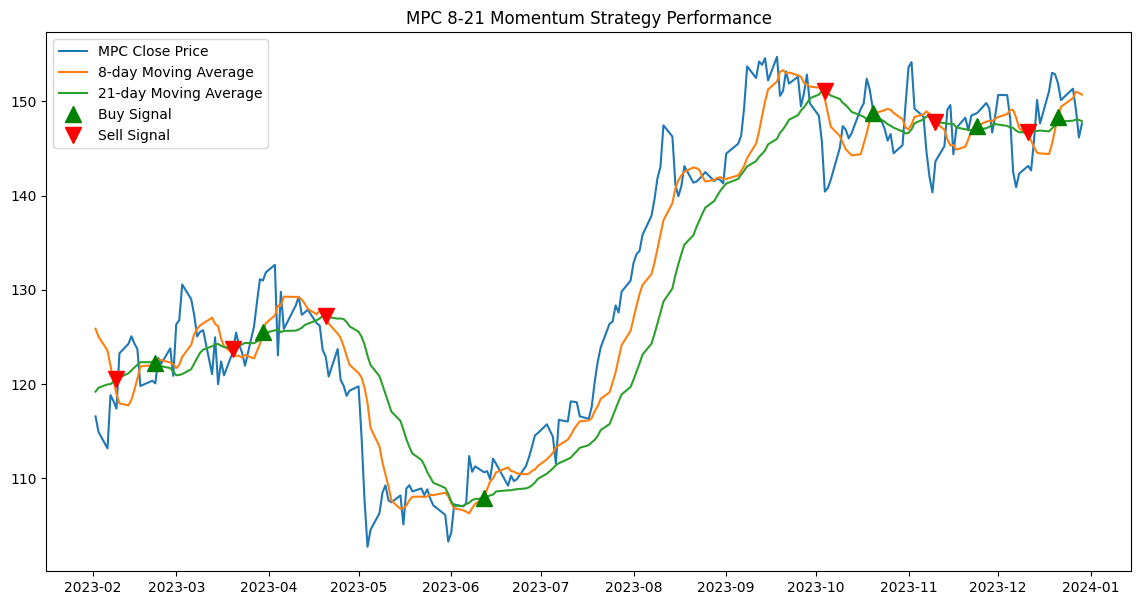

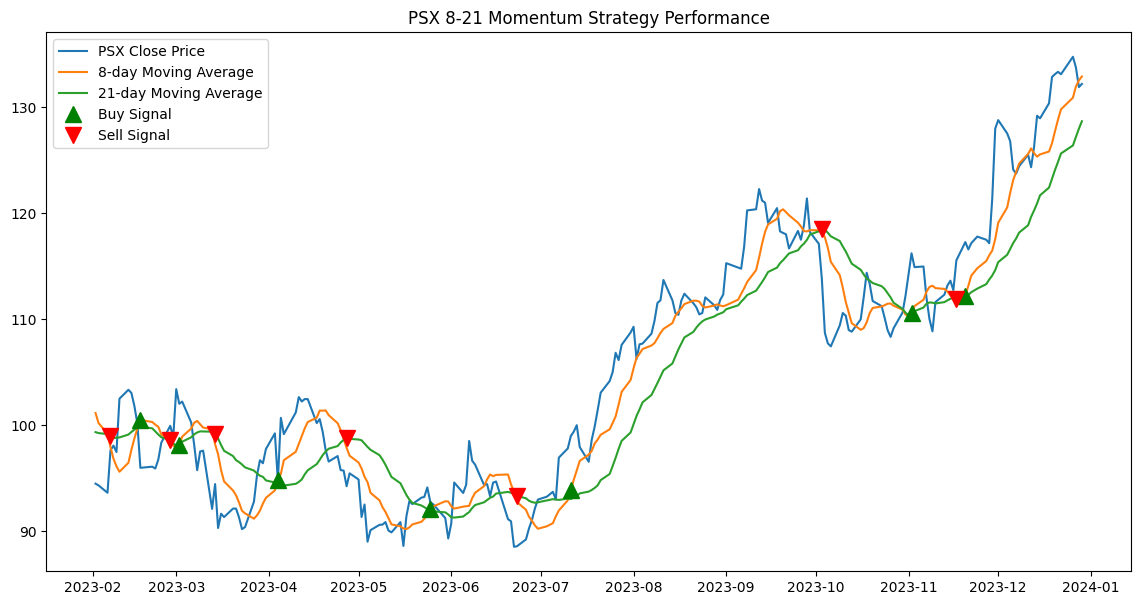

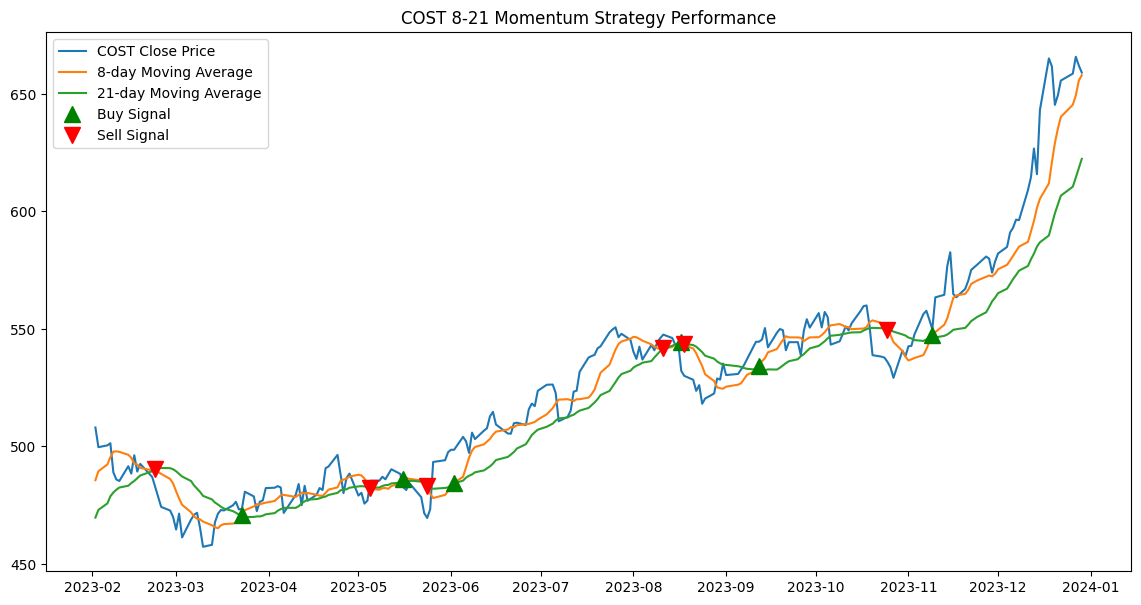

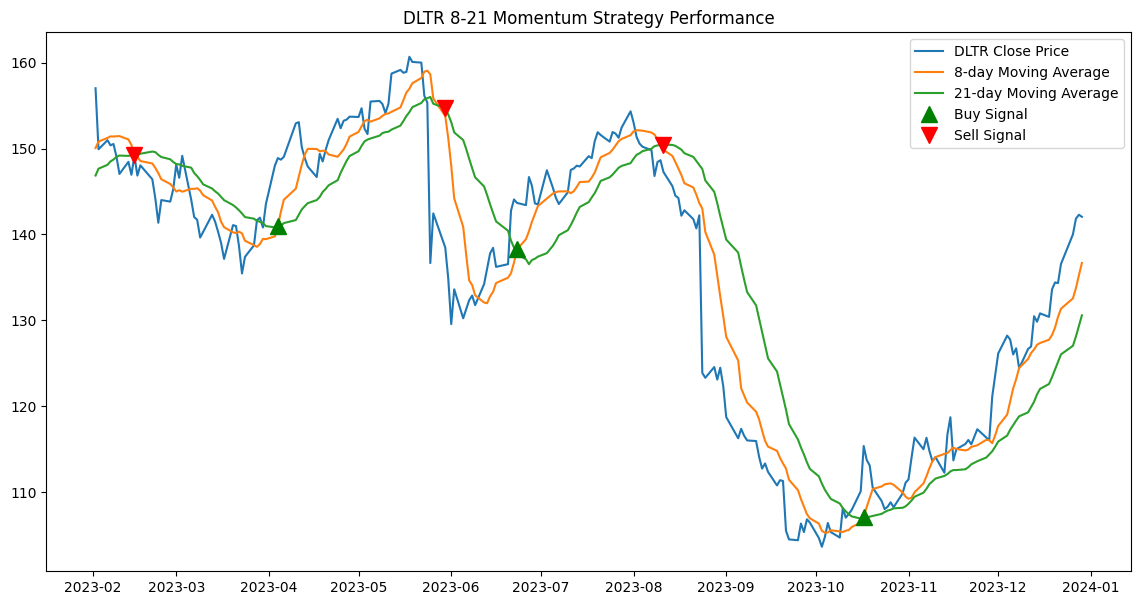

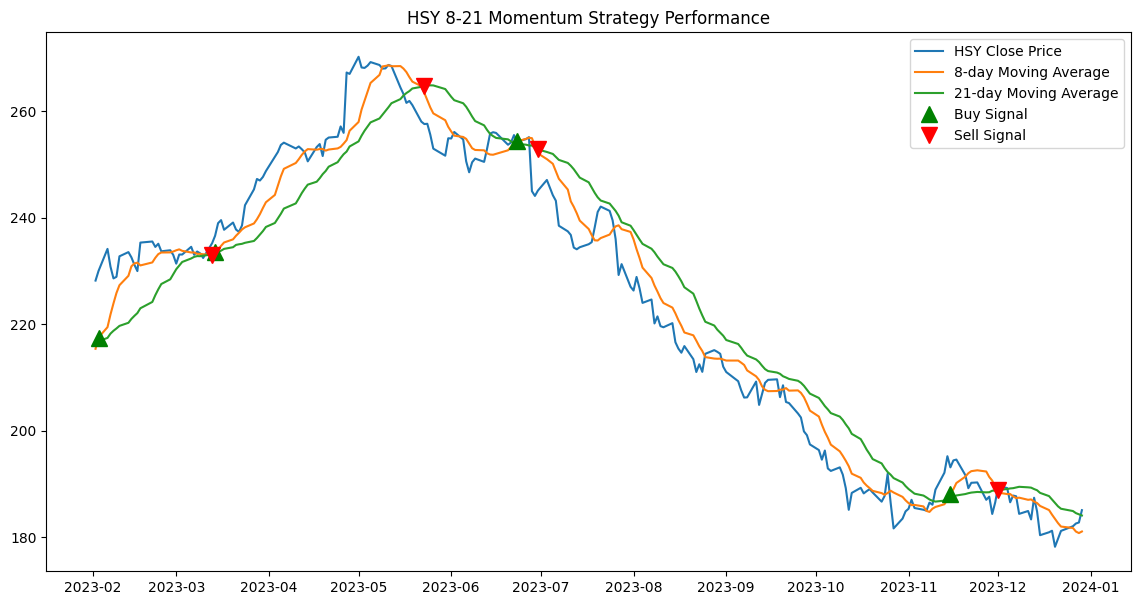

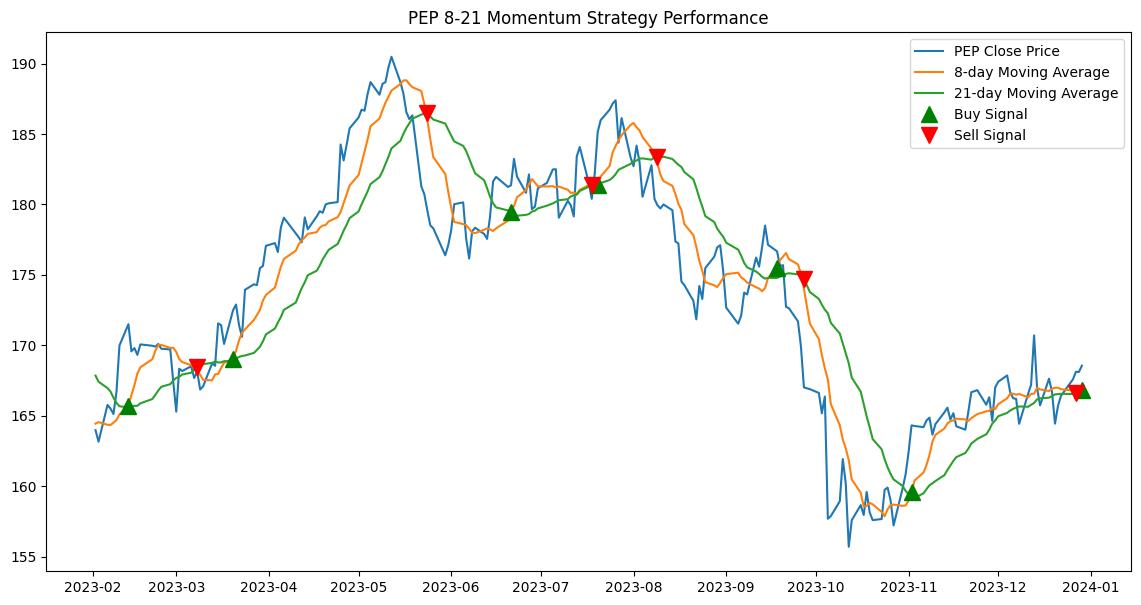

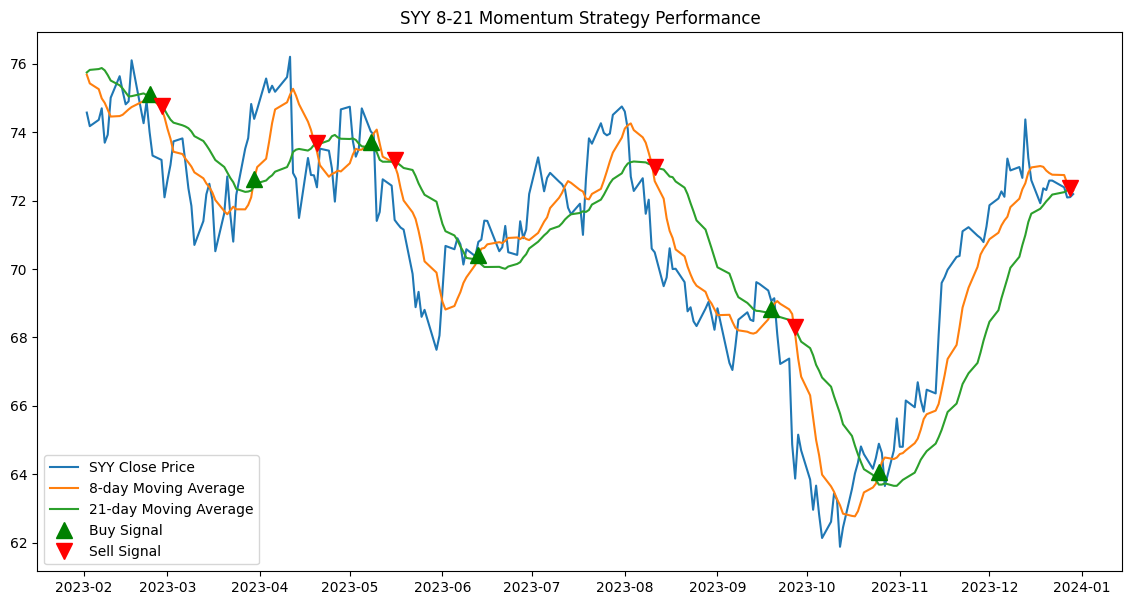

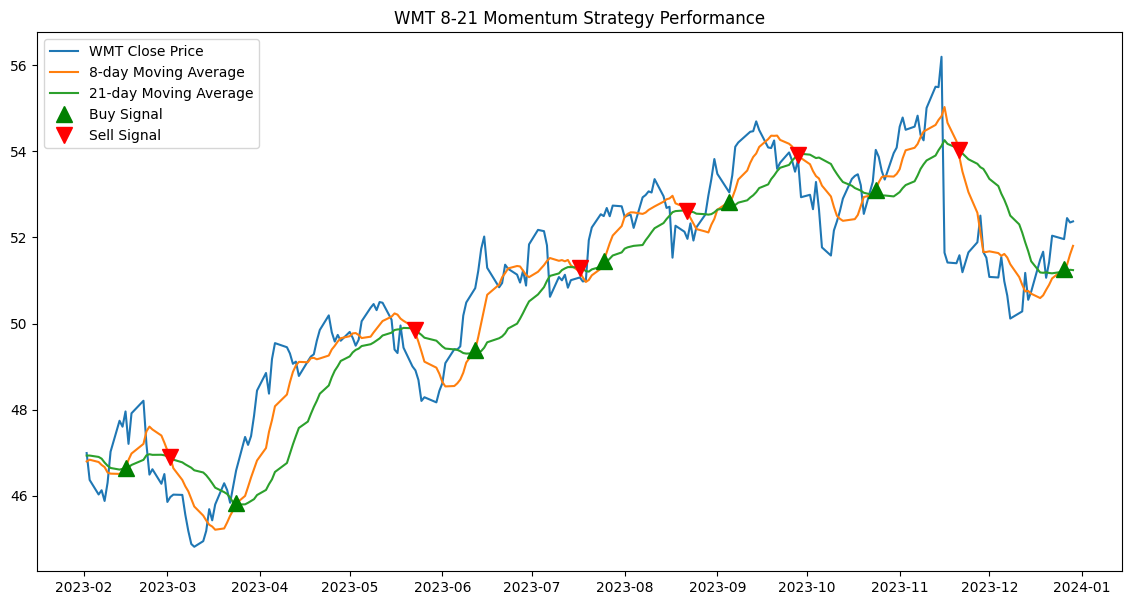

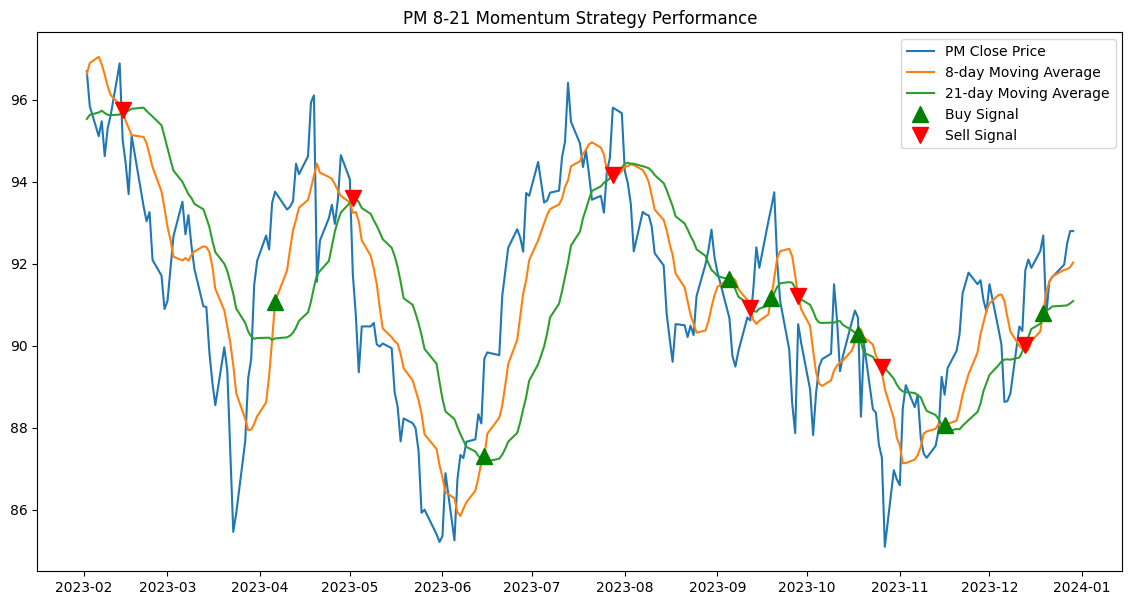

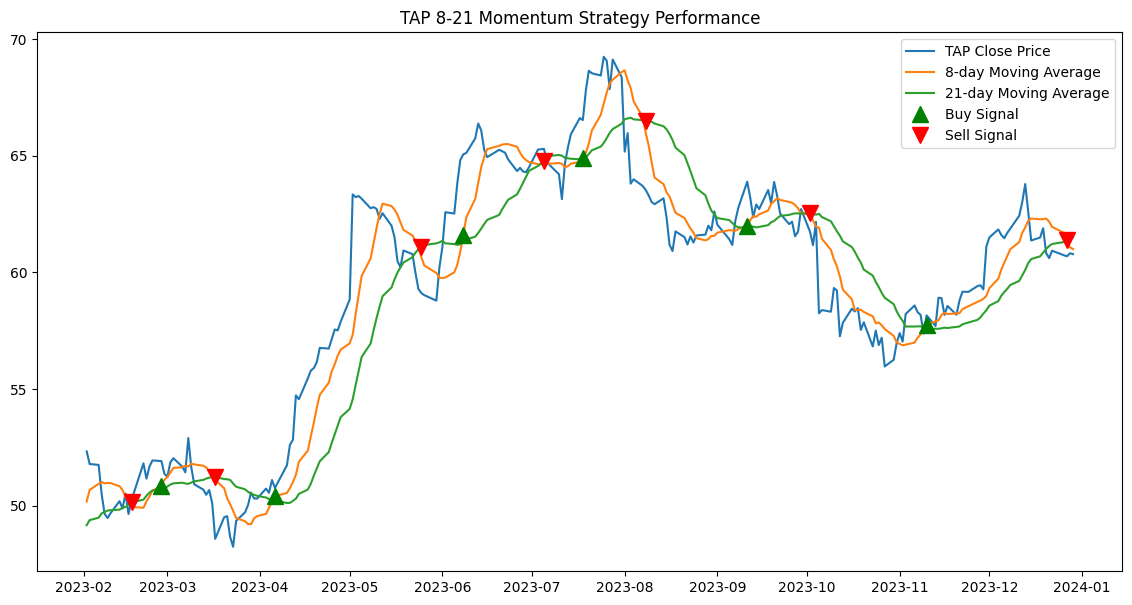

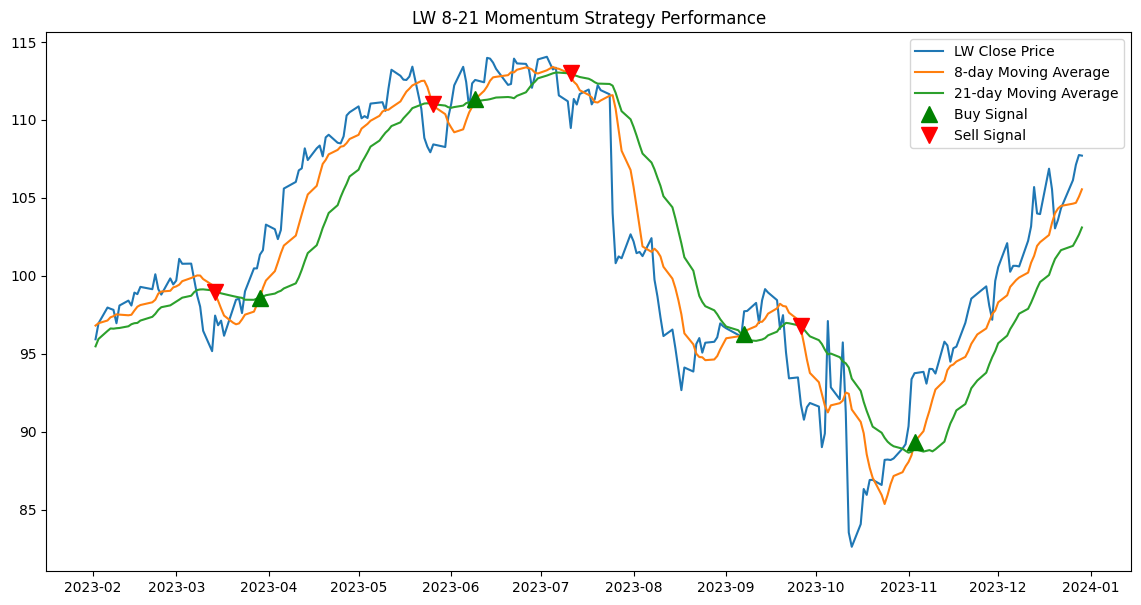

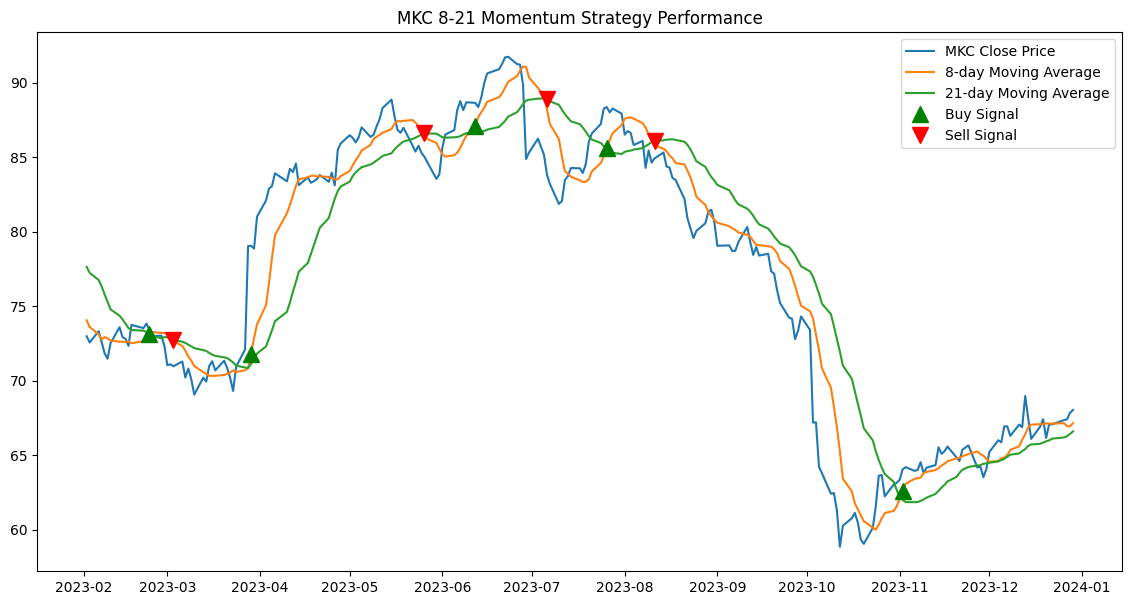

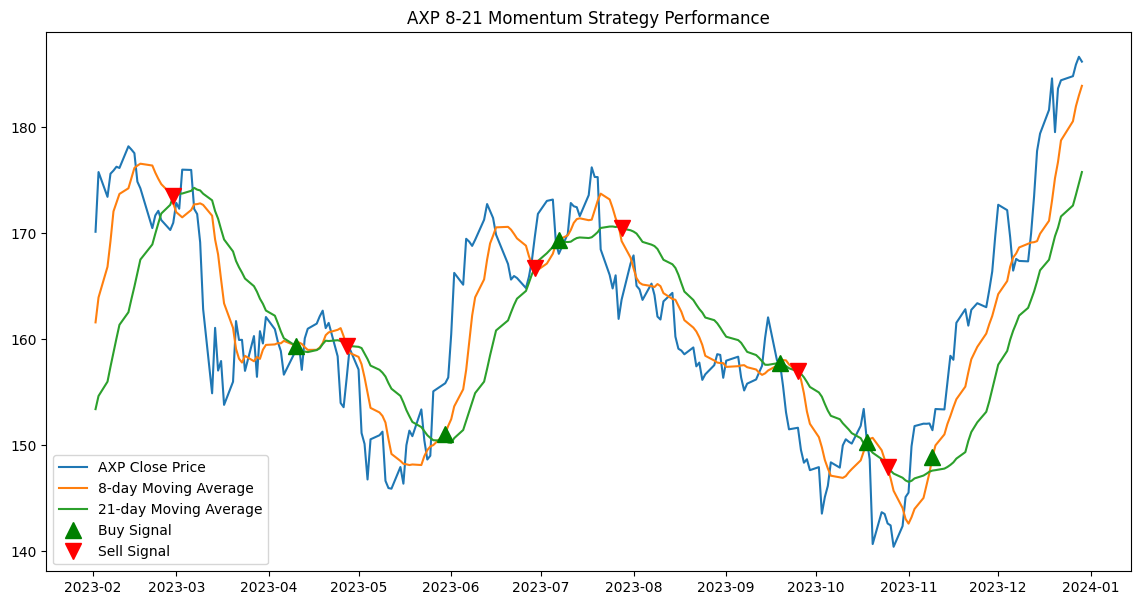

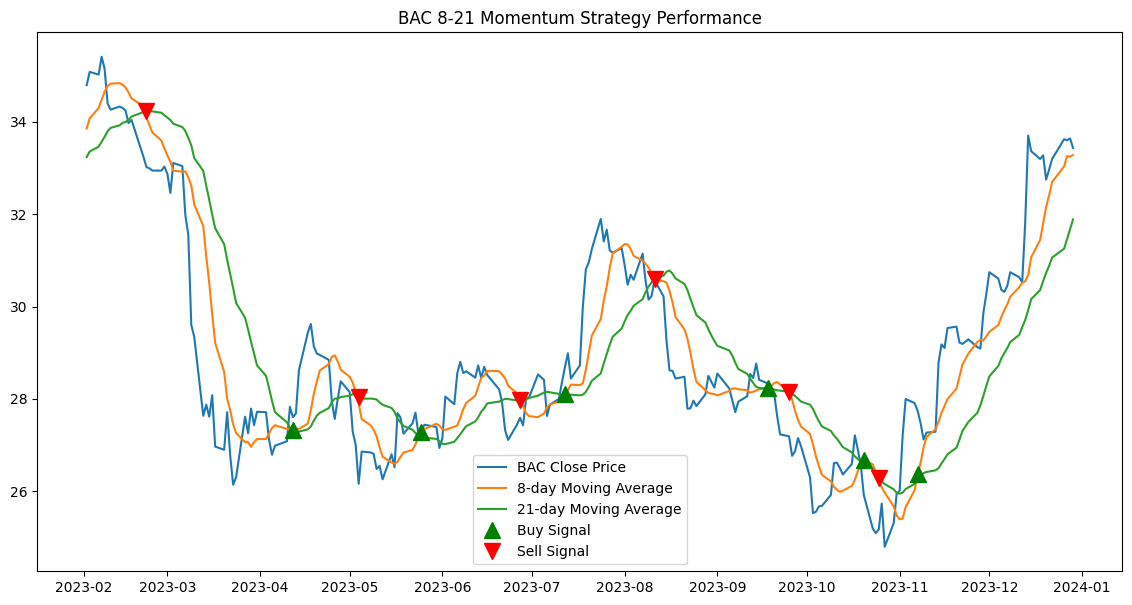

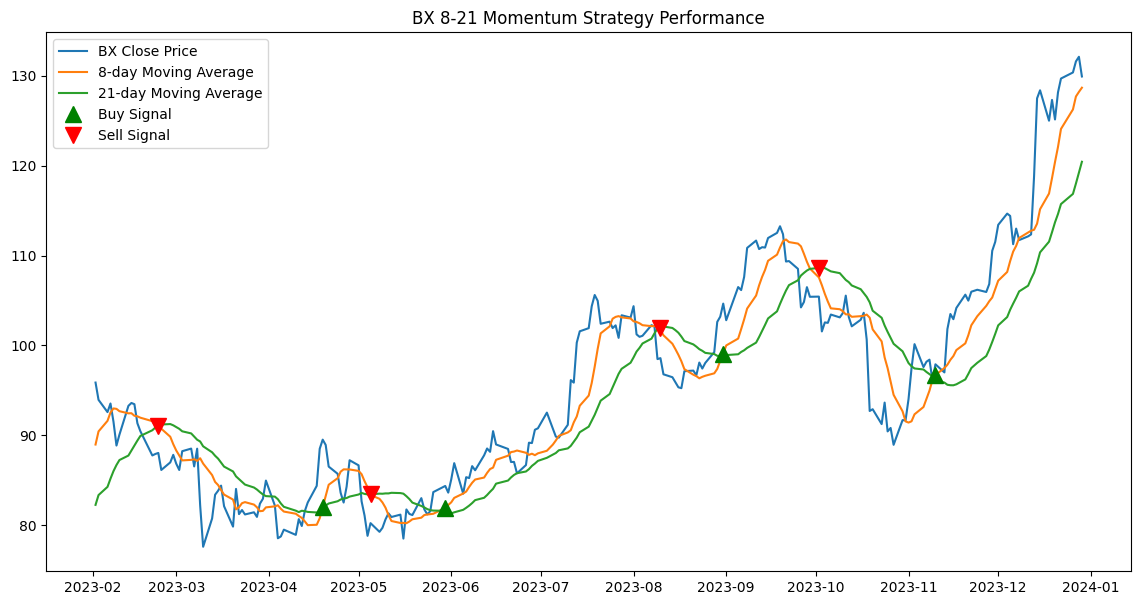

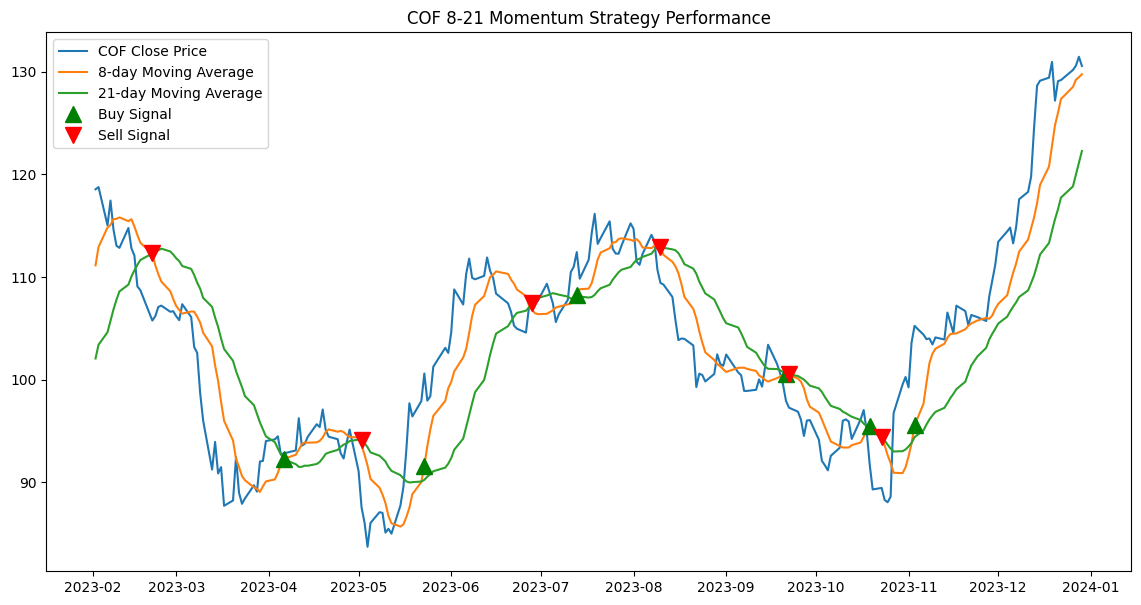

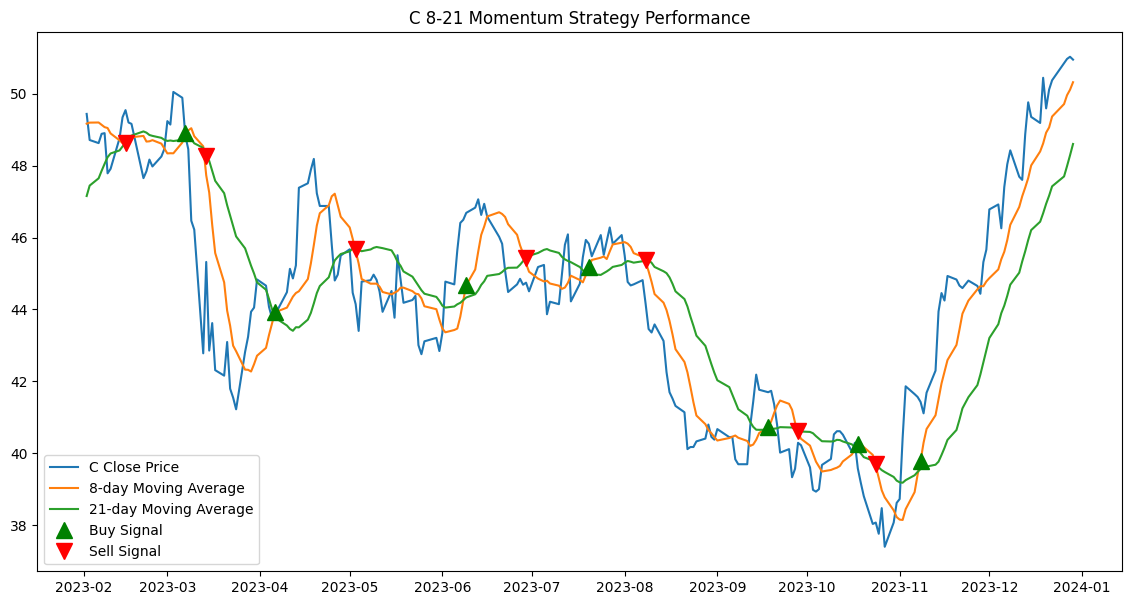

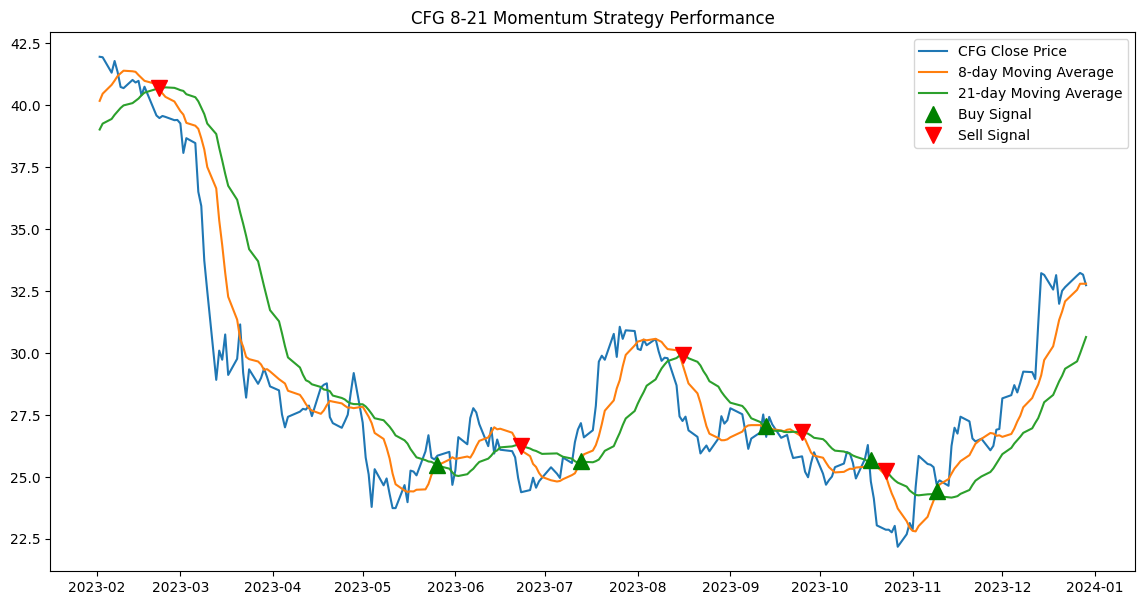

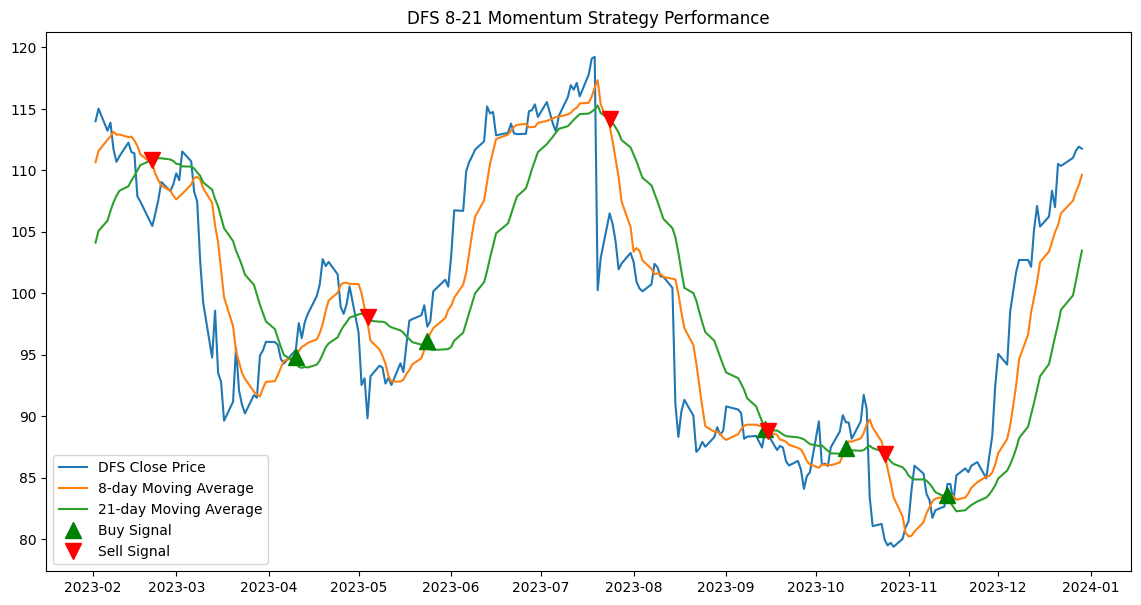

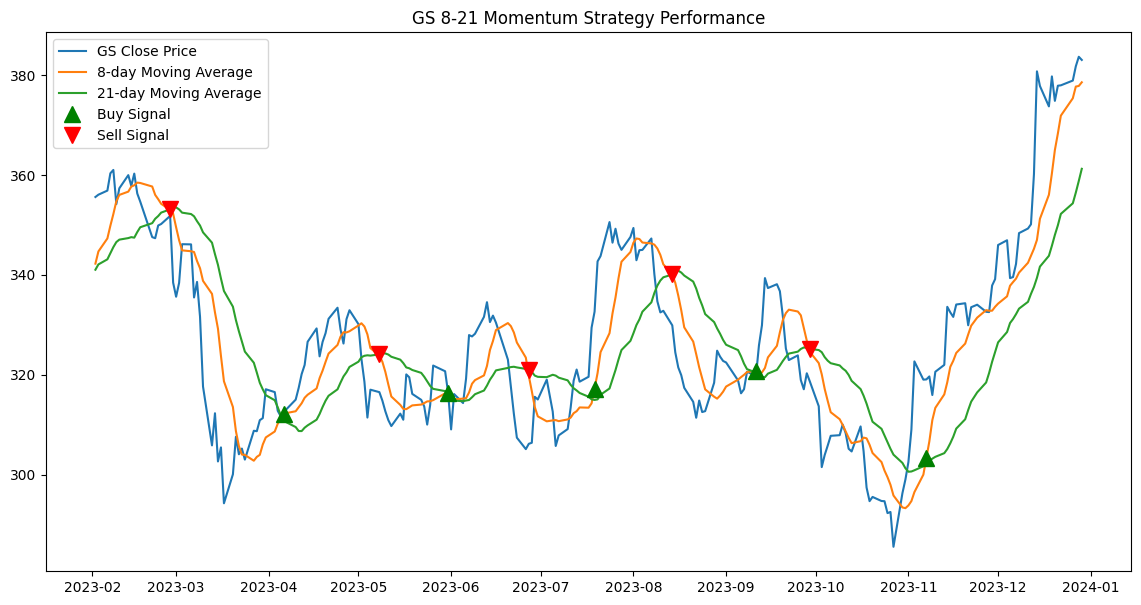

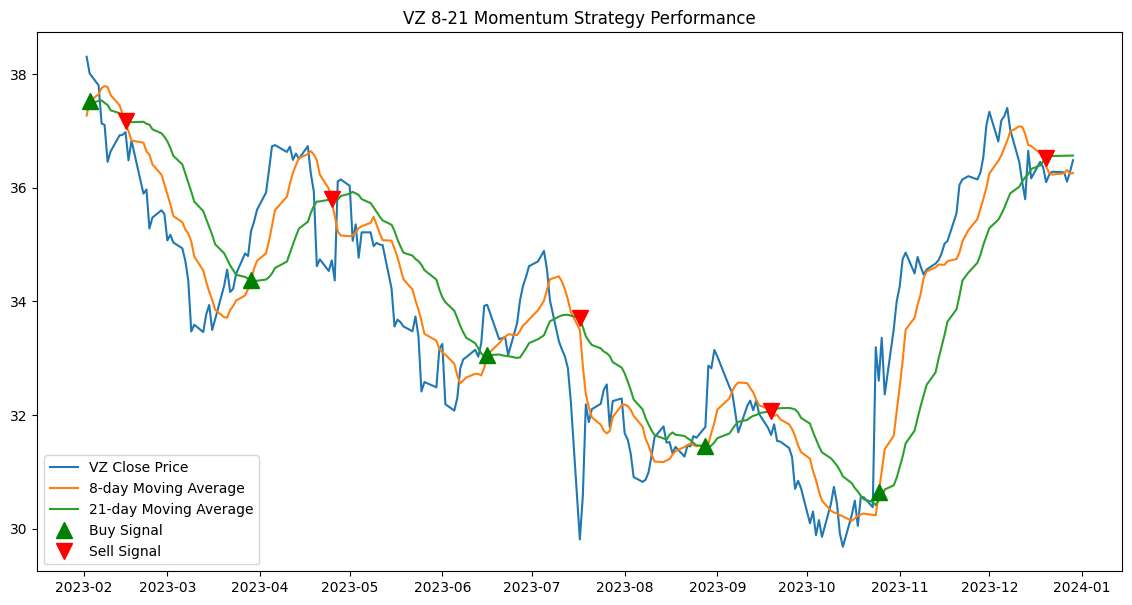

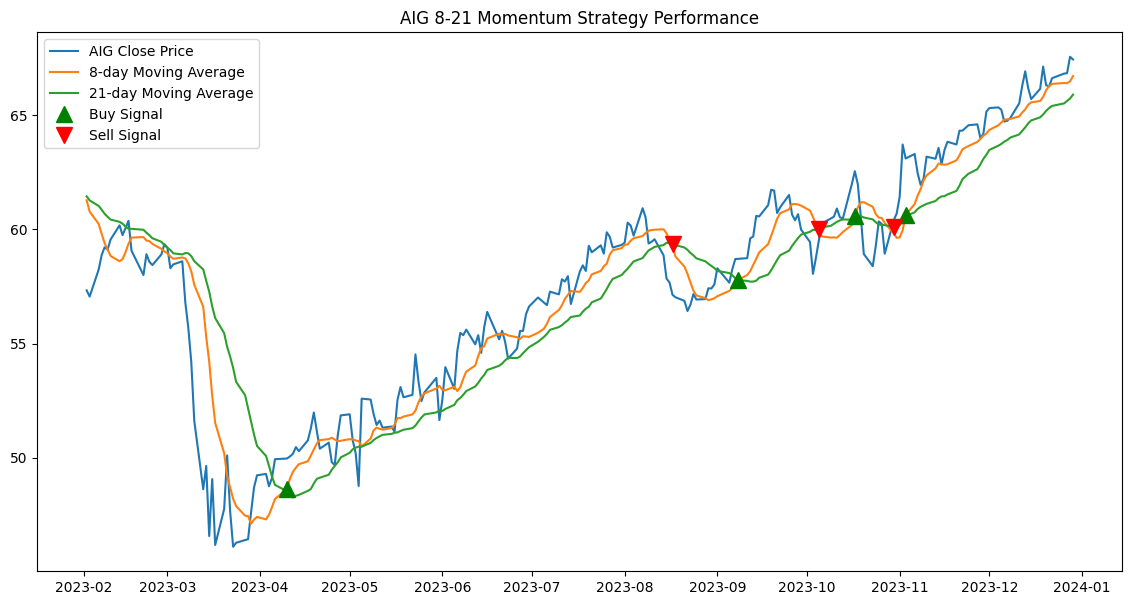

Conclusion for Energy Sector:
Top performing stocks: ['PSX', 'MPC', 'WMB']

Conclusion for Consumer Staples Sector:
Top performing stocks: ['COST', 'LW', 'DLTR']

Conclusion for Financials Sector:
Top performing stocks: ['BX', 'AIG', 'AXP']



In [ ]:
def calculate_momentum_indicators(stock_prices):
    # Initialize a dictionary to store the results for each ticker
    momentum_results = {}

    # Loop through each ticker in the DataFrame's columns
    for ticker in stock_prices.columns:
        # Create a new DataFrame for each stock with 'Close' as the column name
        stock_df = pd.DataFrame(stock_prices[ticker]).rename(columns={ticker: 'Close'})
        # Calculate the 8-day moving average, shifted to the next day to avoid lookahead bias
        stock_df['8-day MA'] = stock_df['Close'].rolling(window=8).mean().shift()
        # Calculate the 21-day moving average, similarly shifted
        stock_df['21-day MA'] = stock_df['Close'].rolling(window=21).mean().shift()
        # Drop rows with NaN values that result from the rolling mean calculation
        stock_df.dropna(inplace=True)
        # Determine the trading position: 1 for "long" if 8-day MA is above the 21-day MA, 0 for "out" otherwise
        stock_df['Position'] = np.where(stock_df['8-day MA'] > stock_df['21-day MA'], 1, 0)
        # Calculate the signal: difference in positions to identify trade entry (1) and exit (-1) points
        stock_df['Signal'] = stock_df['Position'].diff()
        # Calculate log returns for the stock
        stock_df['Returns'] = np.log(stock_df['Close'] / stock_df['Close'].shift(1))
        # Calculate the returns of the strategy by multiplying the position by stock returns
        stock_df['Strategy Returns'] = stock_df['Position'].shift(1) * stock_df['Returns']
        # Calculate the total return of the strategy
        total_return = np.exp(stock_df['Strategy Returns'].sum()) - 1

        # Store the price data and total return in the results dictionary
        momentum_results[ticker] = {
            'Price Data': stock_df,
            'Total Return': total_return
        }

        # Plot the stock price and the moving averages for visual analysis
        plt.figure(figsize=(14, 7))
        plt.plot(stock_df['Close'], label=f'{ticker} Close Price')
        plt.plot(stock_df['8-day MA'], label='8-day Moving Average')
        plt.plot(stock_df['21-day MA'], label='21-day Moving Average')

        # Plot buy signals on the days where the signal is 1 (buy)
        plt.plot(stock_df[stock_df['Signal'] == 1].index,
                 stock_df['8-day MA'][stock_df['Signal'] == 1],
                 '^', color='green', markersize=12, label='Buy Signal')
        # Plot sell signals on the days where the signal is -1 (sell)
        plt.plot(stock_df[stock_df['Signal'] == -1].index,
                 stock_df['21-day MA'][stock_df['Signal'] == -1],
                 'v', color='red', markersize=12, label='Sell Signal')

        # Add title and legend to the plot
        plt.title(f'{ticker} 8-21 Momentum Strategy Performance')
        plt.legend()
        plt.show()

    # Return the dictionary containing the results for further analysis
    return momentum_results

# Date range for the year 2023
start_date = '2023-01-01'
end_date = '2023-12-31'

# Assuming get_stock_data is a function defined elsewhere that fetches the stock data
# Collect the stock data for each sector
energy_prices = get_stock_data(energy_tickers, start_date, end_date)
consumer_staples_prices = get_stock_data(consumer_staples_tickers, start_date, end_date)
financials_prices = get_stock_data(financials_tickers, start_date, end_date)

# Apply the momentum strategy to the collected stock data for each sector
energy_momentum_results = calculate_momentum_indicators(energy_prices)
consumer_staples_momentum_results = calculate_momentum_indicators(consumer_staples_prices)
financials_momentum_results = calculate_momentum_indicators(financials_prices)

# Conclusions and top-three performing stocks for each sector
for sector_name, results in zip(
    ['Energy', 'Consumer Staples', 'Financials'],
    [energy_momentum_results, consumer_staples_momentum_results, financials_momentum_results]
):
    # Print the sector name
    print(f"Conclusion for {sector_name} Sector:")
    # Sort the stocks within the sector by total return in descending order
    sorted_stocks = sorted(results.items(), key=lambda x: x[1]['Total Return'], reverse=True)
    # Extract the top three stocks based on their total return
    top_three_stocks = [stock for stock, data in sorted_stocks[:3]]
    # Print the top three performing stocks
    print(f"Top performing stocks: {top_three_stocks}\n")


According to the MT , we can pick three stocks in each sector.
<br>

*  **Energy Sector:**
Top performing stocks:   ['PSX', 'WMB', 'MPC']

*   **Consumer Staples Sector:**
Top performing stocks:   ['COST', 'LW', 'DLTR']

*   **Financials Sector:**
Top performing stocks:   ['BX', 'AXP', 'AIG']





After the MT Analysis, we want to calculate the cumulative returns.

In [ ]:
# calculate cumulative returns
def calculate_cumulative_returns(strategy_returns):
    """
    Calculate the cumulative returns from the strategy returns.
    """
    cumulative_returns = np.exp(strategy_returns.cumsum()) - 1
    return cumulative_returns.iloc[-1]

# Loop through the momentum results and calculate cumulative returns for each stock
for sector_name, results in zip(
    ['Energy', 'Consumer Staples', 'Financials'],
    [energy_momentum_results, consumer_staples_momentum_results, financials_momentum_results]
):
    print(f"Cumulative Returns for {sector_name} Sector:")
    for ticker, data in results.items():
        cumulative_return = calculate_cumulative_returns(data['Price Data']['Strategy Returns'])
        print(f"{ticker}: {cumulative_return:.2%}")


Cumulative Returns for Energy Sector:
WMB: 6.24%
VLO: -21.05%
EQT: -11.97%
XOM: -12.94%
HAL: -4.79%
HES: -6.68%
MRO: -17.90%
KMI: 3.20%
MPC: 10.94%
PSX: 21.89%
Cumulative Returns for Consumer Staples Sector:
COST: 22.33%
DLTR: 11.50%
HSY: 5.33%
PEP: -4.56%
SYY: -4.99%
WMT: -2.30%
PM: -0.82%
TAP: 1.16%
LW: 13.98%
MKC: 0.38%
Cumulative Returns for Financials Sector:
AXP: 17.41%
BAC: 8.79%
BX: 28.59%
COF: 5.23%
C: -1.15%
CFG: 5.45%
DFS: 12.26%
GS: 15.07%
VZ: -7.20%
AIG: 19.65%


Cumulative Returns Plot for Energy Sector:


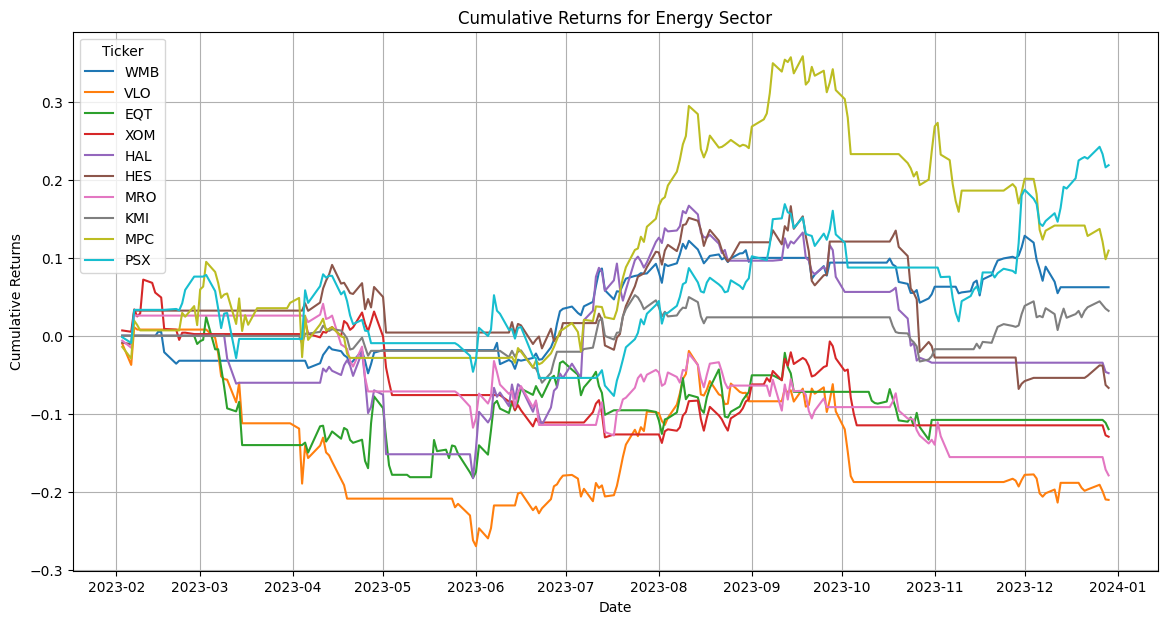

Cumulative Returns Plot for Consumer Staples Sector:


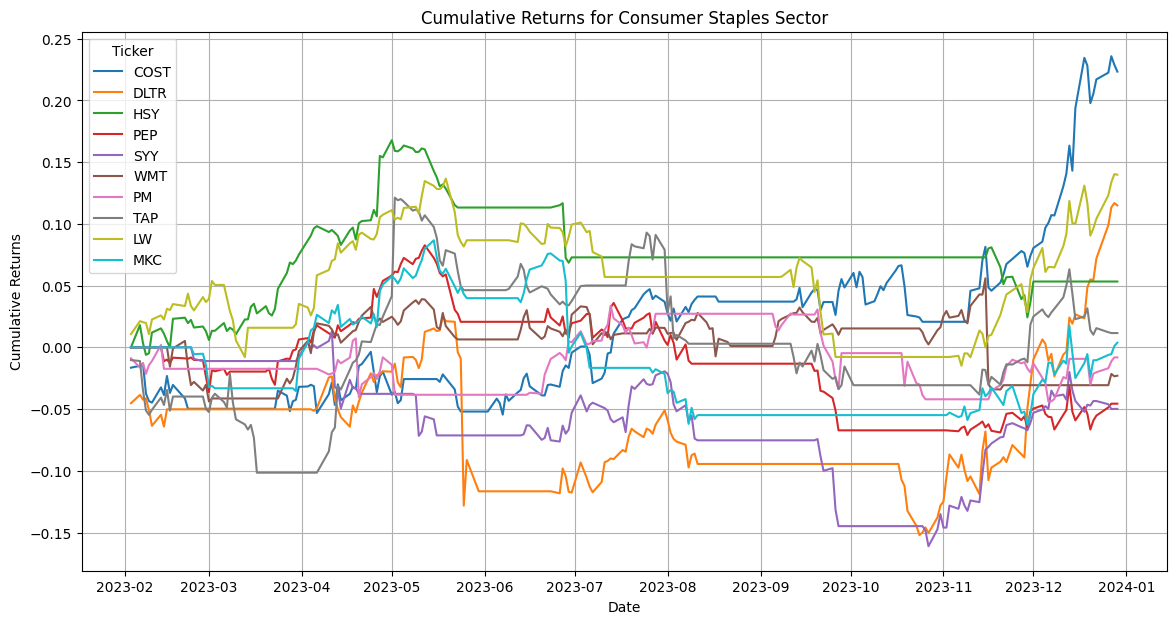

Cumulative Returns Plot for Financials Sector:


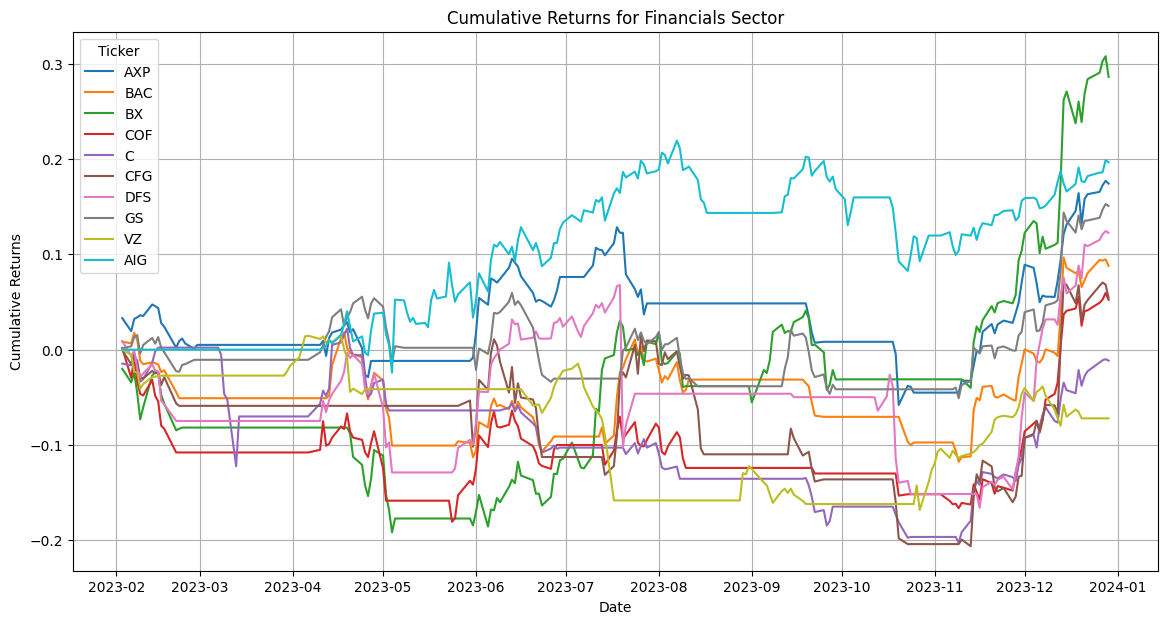

In [ ]:
import matplotlib.pyplot as plt

# Function to plot cumulative returns for all stocks in a sector
def plot_cumulative_returns_for_sector(results, sector_name):
    """
    Plot the cumulative returns from the strategy returns over time for all stocks in the sector.
    """
    plt.figure(figsize=(14, 7))
    for ticker, data in results.items():
        cumulative_returns = np.exp(data['Price Data']['Strategy Returns'].cumsum()) - 1
        plt.plot(cumulative_returns, label=f'{ticker}')

    plt.title(f'Cumulative Returns for {sector_name} Sector')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(title="Ticker")
    plt.grid(True)
    plt.show()

# Loop through the momentum results and plot cumulative returns for each sector
for sector_name, results in zip(
    ['Energy', 'Consumer Staples', 'Financials'],
    [energy_momentum_results, consumer_staples_momentum_results, financials_momentum_results]
):
    print(f"Cumulative Returns Plot for {sector_name} Sector:")
    plot_cumulative_returns_for_sector(results, sector_name)


According to the cumulative returns calculation, we found the three stocks in each sector is the same as MT results.


*   **Cumulative Returns for Energy Sector:**
WMB,
MPC,
PSX

*   **Cumulative Returns for Consumer Staples Sector:**
COST,
DLTR,
LW

*   **Cumulative Returns for Financials Sector:**
AXP,
BX,
AIG



---



---



Based on the momentum trading strategy results for the three sectors and the stocks within them:


*   **Energy Sector**


The visualizations indicate that PSX, WMB, and MPC have shown significant activity with clear signals for buying and selling, demonstrating volatility and potential for traders. The sector as a whole shows diverse behavior, with some stocks revealing steady uptrends, while others exhibit more fluctuations, indicative of the varying dynamics within the energy market.


*   **Consumer Staples Sector**

COST, LW, and DLTR have surfaced as the top performers in the consumer staples sector. The graphs suggest that these stocks had periods of strong momentum, which could have offered profitable opportunities for momentum-based trading. Overall, the consumer staples sector stocks display less volatility compared to the energy sector, which is reflective of the typically defensive nature of consumer staple stocks.


*   **Financials Sector**

The top three stocks identified are BX, AXP, and AIG, with the sector showing a mix of sharp rallies and corrections throughout the year. The movement patterns signal both risks and returns that are characteristic of financial stocks, often influenced by macroeconomic factors.


The graphs illustrate the application of the 8-21 momentum strategy effectively, with each sector revealing unique patterns.

# **3 - Optimization Model (20 pts)**


### **Step1: Prepare the data for model.**

In [ ]:
# Important modules
from yahoo_fin.stock_info import get_data

# Defines a list of 9 stocks
stocks = ['WMB', 'MPC', 'PSX', 'COST', 'DLTR', 'LW', 'AXP', 'BX', 'AIG']

# Date range for obtaining stock data
start_date = '2017-01-01'
end_date = '2022-12-31'

# Initialize an empty DataFrame to store the closing prices of all stocks
close_prices = pd.DataFrame()

# Obtain historical data for each stock
for stock in stocks:
    df = get_data(stock, start_date=start_date, end_date=end_date)
    close_prices[stock] = df['close']

# Calculate daily rate of return
daily_returns = close_prices.pct_change()

# Remove the NaN values
daily_returns = daily_returns.dropna()

# Show the previous lines of data to confirm
df = pd.DataFrame(daily_returns)
df.head()

WMB       MPC       PSX      COST      DLTR        LW  \
2017-01-04 -0.003179 -0.031929  0.005415  0.000188  0.025823 -0.013604   
2017-01-05  0.012117 -0.003708 -0.005959  0.019717 -0.017495 -0.009735   
2017-01-06  0.021424 -0.013320 -0.015448 -0.000491 -0.012426  0.005735   
2017-01-09 -0.015114 -0.018066 -0.016159 -0.011423  0.000649  0.001629   
2017-01-10 -0.107422 -0.009907 -0.003094  0.004287  0.010630 -0.001355   

                 AXP        BX       AIG  
2017-01-04  0.012077  0.059744  0.013053  
2017-01-05 -0.012326  0.020805 -0.005609  
2017-01-06  0.001992  0.002959  0.018445  
2017-01-09  0.005168 -0.001311 -0.006436  
2017-01-10  0.010414 -0.013128  0.012353

In [ ]:
# Calculate the annualized average daily return of each stock
mean_returns = daily_returns.mean() * 252
mean_returns=pd.DataFrame(mean_returns)
mean_returns

0
WMB   0.067805
MPC   0.231085
PSX   0.105486
COST  0.203192
DLTR  0.165917
LW    0.199878
AXP   0.171684
BX    0.230262
AIG   0.065361

In [ ]:
# Calculate the covariance matrix of stock returns
cov_matrix = daily_returns.cov() * 252
# print(cov_matrix)
cov_matrix=pd.DataFrame(cov_matrix)
cov_matrix

WMB       MPC       PSX      COST      DLTR        LW       AXP  \
WMB   0.119117  0.094078  0.084590  0.016095  0.033249  0.046924  0.066054   
MPC   0.094078  0.196838  0.142462  0.021992  0.044668  0.064543  0.093035   
PSX   0.084590  0.142462  0.150701  0.016706  0.034328  0.054376  0.083339   
COST  0.016095  0.021992  0.016706  0.055337  0.031101  0.017356  0.026219   
DLTR  0.033249  0.044668  0.034328  0.031101  0.129963  0.031210  0.039931   
LW    0.046924  0.064543  0.054376  0.017356  0.031210  0.108373  0.064073   
AXP   0.066054  0.093035  0.083339  0.026219  0.039931  0.064073  0.120225   
BX    0.053623  0.073727  0.060643  0.039134  0.037155  0.047059  0.076059   
AIG   0.075679  0.101885  0.087134  0.021006  0.039912  0.064870  0.094654   

            BX       AIG  
WMB   0.053623  0.075679  
MPC   0.073727  0.101885  
PSX   0.060643  0.087134  
COST  0.039134  0.021006  
DLTR  0.037155  0.039912  
LW    0.047059  0.064870  
AXP   0.076059  0.094654  
BX    0.136269  0.072386  
AIG   0.072386  0.138850

In [ ]:
# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = df.mean()
print('Average Return:')
print(df_return)

Average Return:
WMB     0.000269
MPC     0.000917
PSX     0.000419
COST    0.000806
DLTR    0.000658
LW      0.000793
AXP     0.000681
BX      0.000914
AIG     0.000259
dtype: float64


### **Step 2: Build the Nonlinear Optimization Model.**

In [ ]:
# Declare the model
m = ConcreteModel()

# defining variables
# each one is a stock ('WMB', 'MPC', 'PSX', 'COST', 'DLTR', 'LW', 'AXP', 'BX', 'AIG')
m.WMB = Var(within=NonNegativeReals, bounds=(0,1))
m.MPC = Var(within=NonNegativeReals, bounds=(0,1))
m.PSX = Var(within=NonNegativeReals, bounds=(0,1))
m.COST = Var(within=NonNegativeReals, bounds=(0,1))
m.DLTR = Var(within=NonNegativeReals, bounds=(0,1))
m.LW = Var(within=NonNegativeReals, bounds=(0,1))
m.AXP = Var(within=NonNegativeReals, bounds=(0,1))
m.BX = Var(within=NonNegativeReals, bounds=(0,1))
m.AIG = Var(within=NonNegativeReals, bounds=(0,1))


# declare objective
m.objective = Objective(expr =
                        m.WMB*df_return[0] +
                        m.MPC*df_return[1] +
                        m.PSX*df_return[2] +
                        m.COST*df_return[3] +
                        m.DLTR*df_return[4]+
                        m.LW*df_return[5] +
                        m.AXP*df_return[6] +
                        m.BX*df_return[7]+
                        m.AIG*df_return[8],
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.WMB+m.MPC+m.PSX+m.COST+m.DLTR+m.LW+m.AXP+m.BX+m.AIG == 1)

# 2. Set minimum risk: WE ARE INCLUDING THIS CONSTRAINT NOW FOR TECHNICAL REASONS
# It is just initializing the constraint
m.total_risk = Constraint(expr = m.WMB+m.MPC+m.PSX+m.COST+m.DLTR+m.LW+m.AXP+m.BX+m.AIG >= 0.0)

In [ ]:
# Define the function to calculate portfolio risk
def calc_risk(m):
    # Define the variables associated with the stocks
    variables = m.WMB, m.MPC, m.PSX, m.COST, m.DLTR, m.LW, m.AXP, m.BX, m.AIG
    tickers = ["WMB", "MPC", "PSX", "COST", "DLTR", "LW", "AXP", "BX", "AIG"]
    risk_exp = 0
    # Calculate the expression for risk (portfolio variance)
    for i in range(len(variables)):
        for j in range(len(variables)):
            # Use the annualized covariance matrix
            risk_exp += variables[i] * cov_matrix.at[tickers[i], tickers[j]] * variables[j]
    return risk_exp

# Initialize the model 'm' before calling this function

# Assign the risk calculation expression to a variable
expr_risk = calc_risk(m)

# Define max risk level
max_risk = 0.137
# Define min risk level
min_risk = 0.00001
# define the number of risk levels
num_levels = 100
# Define the step
step = (max_risk - min_risk) / (num_levels - 1)
# Create a sequence of risk levels to explore
risk_limits = np.arange(min_risk, max_risk, step) # take 100 tiny steps
risk_limits


array([1.00000000e-05, 1.39373737e-03, 2.77747475e-03, 4.16121212e-03,
       5.54494949e-03, 6.92868687e-03, 8.31242424e-03, 9.69616162e-03,
       1.10798990e-02, 1.24636364e-02, 1.38473737e-02, 1.52311111e-02,
       1.66148485e-02, 1.79985859e-02, 1.93823232e-02, 2.07660606e-02,
       2.21497980e-02, 2.35335354e-02, 2.49172727e-02, 2.63010101e-02,
       2.76847475e-02, 2.90684848e-02, 3.04522222e-02, 3.18359596e-02,
       3.32196970e-02, 3.46034343e-02, 3.59871717e-02, 3.73709091e-02,
       3.87546465e-02, 4.01383838e-02, 4.15221212e-02, 4.29058586e-02,
       4.42895960e-02, 4.56733333e-02, 4.70570707e-02, 4.84408081e-02,
       4.98245455e-02, 5.12082828e-02, 5.25920202e-02, 5.39757576e-02,
       5.53594949e-02, 5.67432323e-02, 5.81269697e-02, 5.95107071e-02,
       6.08944444e-02, 6.22781818e-02, 6.36619192e-02, 6.50456566e-02,
       6.64293939e-02, 6.78131313e-02, 6.91968687e-02, 7.05806061e-02,
       7.19643434e-02, 7.33480808e-02, 7.47318182e-02, 7.61155556e-02,
      

### **Step 3: Run the model.**

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:
  # WE REMOVE AND RECALCULATE THE RISK IN EACH ITERATION
  # m.del_component(m.total_risk)
  # The LHS remains unchanged; we only modify the RHS (risk threshold)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.WMB(), m.MPC(), m.PSX(), m.COST(), m.DLTR(),m.LW(),m.AXP(),m.BX(),m.AIG()]
  # store our returns
  # returns[r] = m.objective()
  returns[r] =  m.WMB()*df_return[0] + m.MPC()*df_return[1] + m.PSX()*df_return[2] + m.COST()*df_return[3] + m.DLTR()*df_return[4]+ m.LW()*df_return[5]+ m.AXP()*df_return[6]+m.BX()*df_return[7]+ m.AIG()*df_return[8]

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.21244192123413086
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.05323338508605957
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.053972721099853516
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.061089277267456055
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03644704818725586
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03714871406555176
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03841662406921387
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03473496437072754
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.030085325241088867
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.027551651000976562
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.030759572982788086
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03647470474243164
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02922534942626953
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.033872365951538086
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.034317731857299805
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03566575050354004
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.033128976821899414
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.028244495391845703
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03663182258605957
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.031288862228393555
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02699732780456543
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.04047226905822754
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.029430627822875977
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.030528783798217773
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0388333797454834
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of so

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03159141540527344
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03576779365539551
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03997802734375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solu

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.032428741455078125
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.021851062774658203
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.024862289428710938
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02581310272216797
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.03085613250732422
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.023561716079711914
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.025389909744262695
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.03154277801513672
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.023253917694091797
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.028510093688964844
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.020713090896606445
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.020615339279174805
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.020283222198486328
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.017679214477539062
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02164769172668457
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.020713329315185547
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02043461799621582
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.026552200317382812
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02134418487548828
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02112555503845215
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02187514305114746
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.021621227264404297
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.01806640625
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.018340349197387695
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.01693892478942871
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02239680290222168
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.020496368408203125
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02007913589477539
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.0209503173828125
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.019982576370239258
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.028977155685424805
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.020428180694580078
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02230525016784668
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.028712987899780273
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.023709535598754883
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.023382186889648438
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.0223541259765625
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# =======

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.024921178817749023
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.023382186889648438
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.023143529891967773
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.024701833724975586
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02419757843017578
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02594470977783203
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.024341344833374023
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.022077083587646484
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.027150869369506836
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.024487972259521484
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.0224301815032959
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.025060415267944336
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.025711536407470703
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.026685476303100586
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02546072006225586
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ======

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.021427392959594727
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02147078514099121
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.01803112030029297
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02168750762939453
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.026691913604736328
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.024437427520751953
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.022790908813476562
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02201557159423828
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.023229598999023438
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02037358283996582
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02063751220703125
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.020145654678344727
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.022283315658569336
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02405548095703125
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.01894974708557129
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.01794886589050293
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.01908397674560547
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ======

### **Step 4: Delete Infeasible solutions**

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.WMB(),m.MPC(),m.PSX(),m.COST(),m.DLTR(),m.LW(),m.AXP(),m.BX(),m.AIG()]
  # store our returns
  returns[r] =  m.WMB()*df_return[0] + m.MPC()*df_return[1] + m.PSX()*df_return[2] + m.COST()*df_return[3] + m.DLTR()*df_return[4] + m.LW()*df_return[5] + m.AXP()*df_return[6] + m.BX()*df_return[7] + m.AIG()*df_return[8]


  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasibl

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02070784568786621
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ======

### **Step 5: Parameter Analysis**

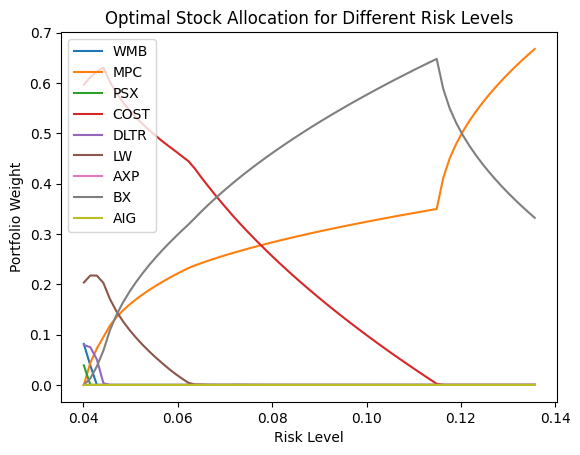

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = [ "WMB","MPC","PSX","COST","DLTR","LW","AXP","BX","AIG"]
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.xlabel('Risk Level')  # X-axis label
plt.ylabel('Portfolio Weight')  # Y-axis label
plt.show()

In [ ]:
# here is what the proportion allocated look like
# the index is the risk level
param_analysis

WMB       MPC       PSX      COST      DLTR        LW  \
0.040138  0.081457  0.000038  0.038820  0.596629  0.079434  0.203509   
0.041522  0.038550  0.043937  0.000327  0.611617  0.074882  0.217530   
0.042906  0.000012  0.072521  0.000011  0.622736  0.050455  0.217265   
0.044290  0.000007  0.095319  0.000008  0.630416  0.003303  0.202606   
0.045673  0.000005  0.117988  0.000007  0.602335  0.000050  0.170557   
...            ...       ...       ...       ...       ...       ...   
0.130081  0.000004  0.619317  0.000005  0.000024  0.000010  0.000021   
0.131465  0.000004  0.632178  0.000005  0.000024  0.000010  0.000021   
0.132849  0.000004  0.644505  0.000005  0.000024  0.000010  0.000021   
0.134233  0.000004  0.656361  0.000005  0.000024  0.000010  0.000021   
0.135616  0.000004  0.667793  0.000005  0.000024  0.000010  0.000021   

               AXP        BX       AIG  
0.040138  0.000031  0.000075  0.000008  
0.041522  0.000051  0.013099  0.000007  
0.042906  0.000026  0.036968  0.000006  
0.044290  0.000019  0.068318  0.000005  
0.045673  0.000017  0.109036  0.000005  
...            ...       ...       ...  
0.130081  0.000011  0.380604  0.000004  
0.131465  0.000011  0.367743  0.000004  
0.132849  0.000011  0.355417  0.000004  
0.134233  0.000011  0.343560  0.000004  
0.135616  0.000011  0.332128  0.000004  

[70 rows x 9 columns]

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.04013838383838384, 0.04152212121212122, 0.042905858585858596, 0.044289595959595966, 0.04567333333333334, 0.047057070707070714, 0.04844080808080809, 0.04982454545454546, 0.05120828282828283, 0.05259202020202021, 0.05397575757575759, 0.05535949494949496, 0.05674323232323233, 0.058126969696969705, 0.05951070707070708, 0.06089444444444445, 0.06227818181818182, 0.0636619191919192, 0.06504565656565657, 0.06642939393939394, 0.06781313131313131, 0.06919686868686868, 0.07058060606060607, 0.07196434343434344, 0.0733480808080808, 0.07473181818181819, 0.07611555555555556, 0.07749929292929293, 0.0788830303030303, 0.08026676767676767, 0.08165050505050506, 0.08303424242424243, 0.0844179797979798, 0.08580171717171718, 0.08718545454545455, 0.08856919191919192, 0.08995292929292929, 0.09133666666666666, 0.09272040404040405, 0.09410414141414142, 0.09548787878787879, 0.09687161616161617, 0.09825535353535354, 0.09963909090909091, 0.10102282828282828, 0.10240656565656565, 0.10379030303030304, 0.1051740404

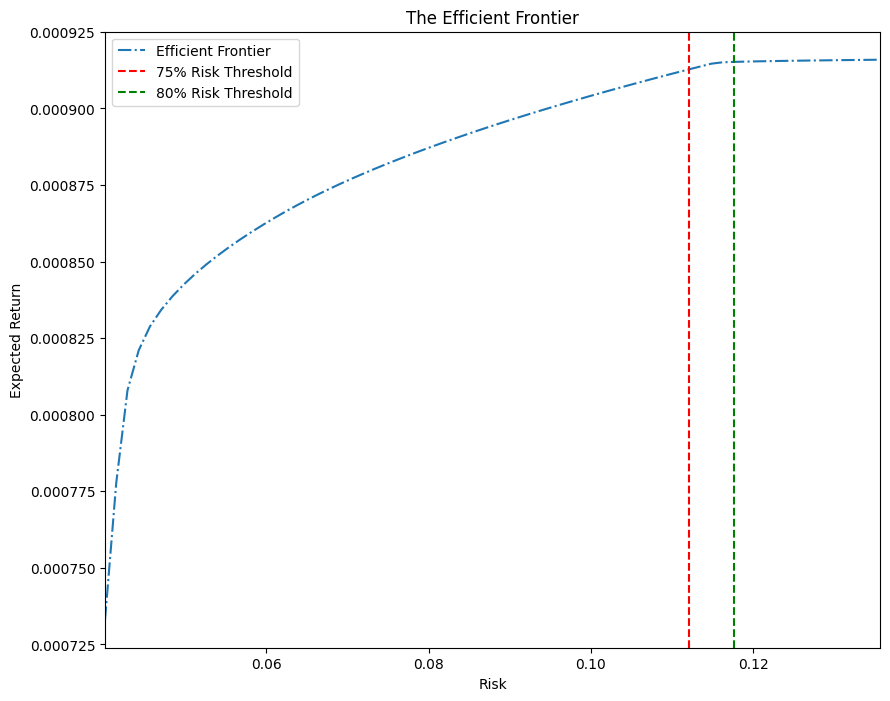

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(risk, reward, '-.', label='Efficient Frontier')  # Draw an effecient frontier curve
plt.title('The Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Return')

# According to the data of risk and reward to set the index
twenty_five_percent_index = int(len(risk) * 0.75)

# Draw a 100% minus 25% risk threshold line
plt.axvline(x=risk[twenty_five_percent_index], color='red', linestyle='--', label='75% Risk Threshold')

# Draw a 80% risk threshold line
# We can simply view from the figure to ensure that at least 80% of risk level data is visualized
eighty_percent_line = int(len(risk) * 0.8)
plt.axvline(x=risk[eighty_percent_line], color='green', linestyle='--', label='80% Risk Threshold')

# Show the whole risk level data
plt.xlim(left=risk[0], right=risk[int(len(risk)) - 1])

# Show legend
plt.legend()

# Show the plot!
plt.show()

In [ ]:
import numpy as np
# Define a threshold to consider a stock as "actively" invested in
active_threshold = 0.25
# Extract portfolios where exactly three stocks have significant allocations
selected_portfolios = {}  # Create an empty dictionary to store eligible investment portfolios
counter = 0
for risk_level, allocations in param_analysis.iterrows():  # Iterate over each key-value pair in the param_analysis dictionary
  # Create a temporary list to store stocks that are greater than the active threshold
  active_stocks = [stock for stock in allocations if stock > active_threshold]
  if len(active_stocks) == 3:  # If the proportion of three stocks happens to be greater than the active threshold
    print(active_stocks)
    counter+=1
    print("active stock allocations at position (index starts from 0):")
    for stk in active_stocks:
      # Extra information of locations for analysis
      row_indices, col_indices = np.where(param_analysis.values == stk)
      print(row_indices, col_indices)
      selected_portfolios[risk_level] = allocations  # Add this investment portfolio to the selected_portfolios dictionary

print("Total:", counter, "portfolios selected under the active_threshold =", active_threshold)
print("================================================")

# Check if any portfolios meet the criteria and select one
if selected_portfolios:
  chosen_risk = next(iter(selected_portfolios))  # Choose the first suitable risk level
  chosen_portfolio = selected_portfolios[chosen_risk]
  print("Selected Risk Level:", chosen_risk)
  print("Portfolio Allocations:", {stock: round(percentage, 4) for stock, percentage in chosen_portfolio.items()})
else:
  print("No portfolio found that matches the criteria of exactly three active stocks.")

[0.2510020888519905, 0.37924983295707276, 0.36944051061970207]
active stock allocations at position (index starts from 0):
[20] [1]
[20] [3]
[20] [7]
[0.25513060986130676, 0.3635473915330813, 0.38107657085738217]
active stock allocations at position (index starts from 0):
[21] [1]
[21] [3]
[21] [7]
[0.2591109044971219, 0.3483614575842182, 0.3923139694867806]
active stock allocations at position (index starts from 0):
[22] [1]
[22] [3]
[22] [7]
[0.26291323102614145, 0.33336212202681315, 0.4032479331547499]
active stock allocations at position (index starts from 0):
[23] [1]
[23] [3]
[23] [7]
[0.2666587108357761, 0.3192028284161532, 0.41376943791324516]
active stock allocations at position (index starts from 0):
[24] [1]
[24] [3]
[24] [7]
[0.27029066202205154, 0.3054136495946241, 0.42399590767230133]
active stock allocations at position (index starts from 0):
[25] [1]
[25] [3]
[25] [7]
[0.27382023183598125, 0.2919774925341145, 0.433948515071158]
active stock allocations at position (inde

We defined a threshold of 0.25 to consider whether a stock is "actively" invested in, and worked out 10 sets of stocks which contain exact 3 stocks as actively invested in, those sets (stocks and allocations) are extracted from the MPT model.
<br>

From the results, we chose the first eligible portfolio for future analysis. The risk level is 0.0678, and the three stocks are:
<br>
'MPC': 0.251, 'COST': 0.3792, 'BX': 0.3694.

### **Step 6: Further Explore**

In [ ]:
# Convert risk data to dataframe
risk = pd.DataFrame(risk)
# Convert the income data to dataframe
reward = pd.DataFrame(reward)
# Add a column
reward['risk'] = risk
# Rename the column
reward.rename({0:'reward'}, axis=1, inplace=True)

# Calculate the difference in reward
reward['Diff'] = reward['reward'].diff()
# Calculate the percentage change in reward
reward['percDiff'] = reward['reward'].pct_change()
reward

reward      risk          Diff  percDiff
0   0.000733  0.040138           NaN       NaN
1   0.000778  0.041522  4.472068e-05  0.061004
2   0.000808  0.042906  3.017563e-05  0.038796
3   0.000821  0.044290  1.306376e-05  0.016168
4   0.000829  0.045673  7.787281e-06  0.009485
..       ...       ...           ...       ...
65  0.000916  0.130081  4.399627e-08  0.000048
66  0.000916  0.131465  4.199880e-08  0.000046
67  0.000916  0.132849  4.025189e-08  0.000044
68  0.000916  0.134233  3.871741e-08  0.000042
69  0.000916  0.135616  3.732763e-08  0.000041

[70 rows x 4 columns]

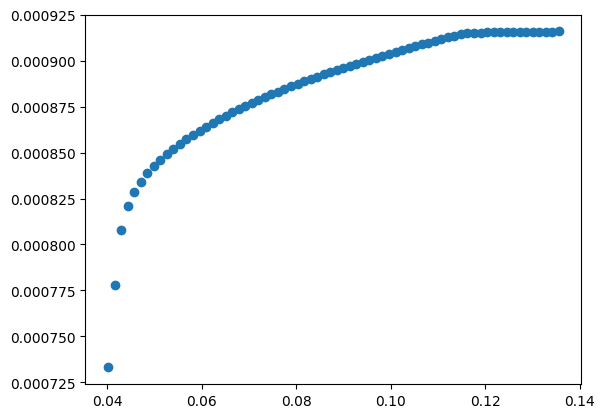

In [ ]:
# Scatter plot of risk and reward
plt.scatter(x=reward['risk'], y=reward['reward'])
plt.show()

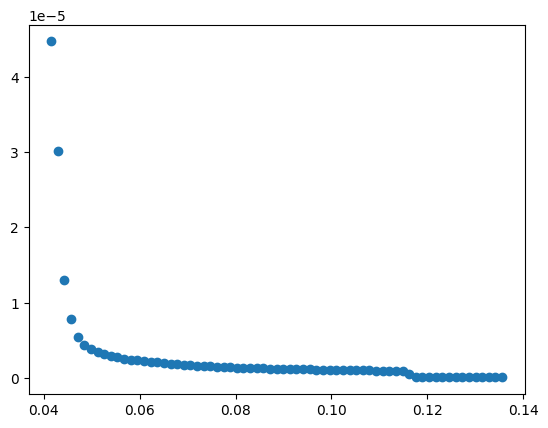

In [ ]:
# Scatter plot of risk and reward changes
plt.scatter(x=reward['risk'], y=reward['Diff'])
plt.show()

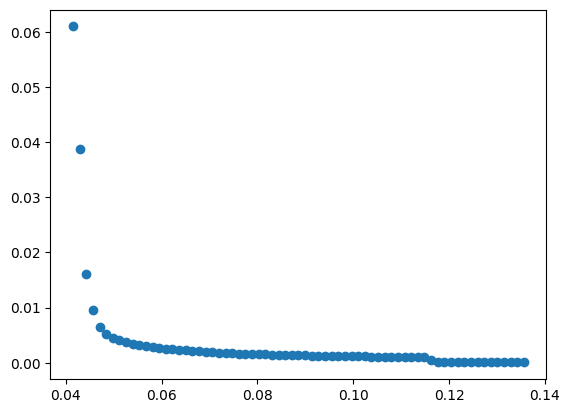

In [ ]:
# Scatter plot of the percentage change in risk and reward
plt.scatter(x=reward['risk'], y=reward['percDiff'])
plt.show()

# **4 - Analysis (25 pts)**

In [ ]:
# Helper function to get the first trading day of each month
def get_first_trading_day(df):
    return df.resample('MS').first()

#Function to get historical stock data and calculate the moving average
def fetch_and_prepare_data(tickers, start_date, end_date):
    df = get_stock_data(tickers, start_date, end_date)
    return df

#Defining tickers, dates and investment
tickers = ['MPC', 'COST', 'BX']
gspc_ticker = ['^GSPC']
start_date = '2022-12-15'  # Start earlier to have data for moving averages
end_date = '2023-12-31'
initial_investment = 100000

#Fetch data
mpt_data = fetch_and_prepare_data(tickers, start_date, end_date)
gspc_data = fetch_and_prepare_data(gspc_ticker, start_date, end_date)



In [ ]:
# Function to calculate the value of portfolio holdings over time
def calculate_holdings(df, allocations, initial_investment):
    # initial number of shares for each stock and total value of holdings over time
    shares = {stock: initial_investment * allocation / df[stock].iloc[0] for stock, allocation in allocations.items()}
    df_value = pd.DataFrame({stock: df[stock] * shares[stock] for stock in df.columns})
    df_value['Total'] = df_value.sum(axis=1)
    return df_value

In [ ]:
#Calculate buy-and-hold strategy values
mpt_holdings = calculate_holdings(mpt_data, {'MPC': 0.251, 'COST': 0.3792, 'BX': 0.3694}, initial_investment)
gspc_holdings = calculate_holdings(gspc_data, {'^GSPC': 1}, initial_investment)

#monthly values for both strategies by calling function
mpt_monthly = get_first_trading_day(mpt_holdings)
gspc_monthly = get_first_trading_day(gspc_holdings)

In [ ]:
#Implementing and using the 8-21 Momentum Strategy
gspc_data['MA8'] = gspc_data['^GSPC'].rolling(window=8).mean()
gspc_data['MA21'] = gspc_data['^GSPC'].rolling(window=21).mean()
gspc_data['Position'] = (gspc_data['MA8'] > gspc_data['MA21']).astype(int).diff().fillna(0)

#Calculate strategy performance
gspc_data['Momentum Hold'] = gspc_data['Position'].shift(1) * gspc_data['^GSPC'].pct_change()
gspc_data['Cumulative Momentum'] = (1 + gspc_data['Momentum Hold']).cumprod()
gspc_momentum_monthly = get_first_trading_day(gspc_data[['Cumulative Momentum']])

#Print tables
print("MPT Portfolio Monthly Values:\n", mpt_monthly)
print("GSPC Buy-and-Hold Monthly Values:\n", gspc_monthly)
print("GSPC Momentum Strategy Monthly Values:\n", gspc_momentum_monthly)

MPT Portfolio Monthly Values:
                      MPC          COST            BX          Total
2022-12-01  25100.000000  37920.000000  36940.000000   99960.000000
2023-01-01  25111.319174  37051.106679  36333.875293   98496.301147
2023-02-01  27839.334245  42333.955519  46394.542339  116567.832103
2023-03-01  29419.007394  39194.595002  43241.873160  111855.475557
2023-04-01  30887.791009  40697.950199  40920.357591  112506.098798
2023-05-01  27886.458389  40416.277207  43151.850200  111454.585796
2023-06-01  24273.160278  42060.401966  42369.038384  108702.600629
2023-07-01  26948.777095  44393.986607  46074.019111  117416.782814
2023-08-01  30938.133977  45578.019222  51975.574497  128491.727695
2023-09-01  33634.548799  44741.758120  51196.528044  129572.834963
2023-10-01  34570.121514  46966.309549  52504.735329  134041.166393
2023-11-01  35766.092076  45773.472723  46830.158020  128369.722819
2023-12-01  35084.841942  49106.541344  56482.851179  140674.234466
GSPC Buy-and-Hold

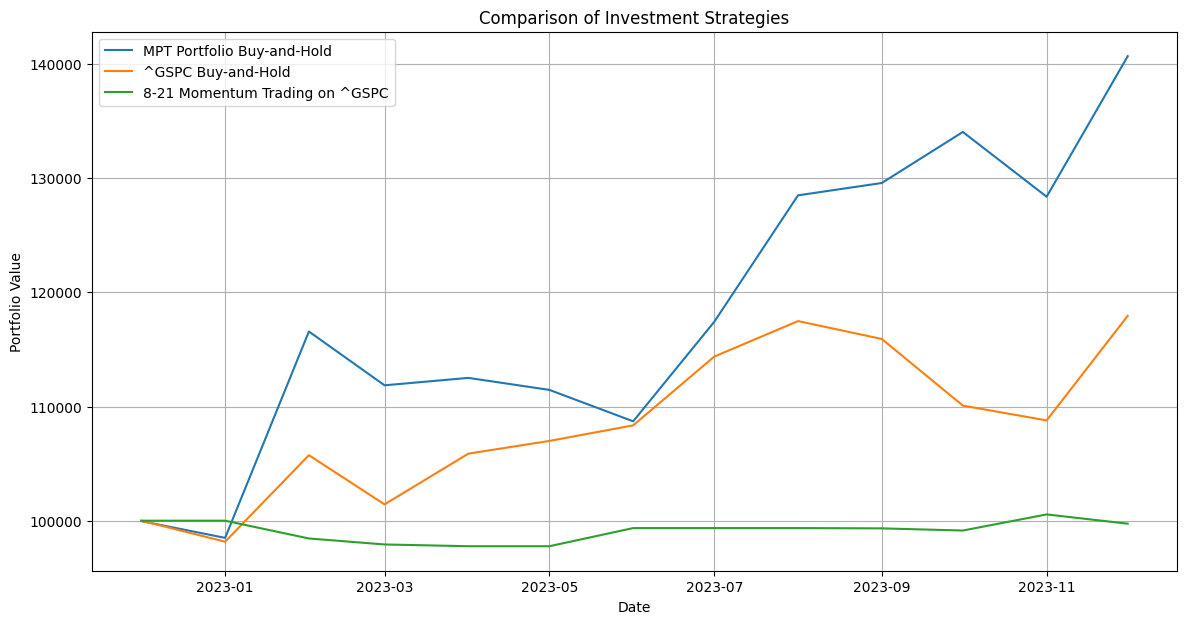

In [ ]:
#Plotting the comparison
plt.figure(figsize=(14, 7))
plt.plot(mpt_monthly['Total'], label='MPT Portfolio Buy-and-Hold')
plt.plot(gspc_monthly['Total'], label='^GSPC Buy-and-Hold')
plt.plot(gspc_momentum_monthly.index, gspc_momentum_monthly['Cumulative Momentum'] * initial_investment, label='8-21 Momentum Trading on ^GSPC')
plt.title('Comparison of Investment Strategies')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

# **5 - Conclusion (5 pts)**



1.   In the data preparation stage, we successfully collected and preliminarily processed daily stock price data for the consumer staples, energy, and financial sectors. Preliminary exploration indicates that the data is of good quality with no missing values. Although there are some outliers, we consider these as part of the stock's volatility, not anomalies in data collection. Good data preparation lays a solid foundation for the application of a robust momentum trading strategy in the next stage.

<br>

2.  As for momentum Trading for Stock Selection, we applied the "8-21 Momentum Strategy". Through meticulous trend analysis, revealed the best-performing stocks in each of the three sectors, namely ['PSX', 'WMB', 'MPC'], ['COST', 'LW', 'DLTR'], and ['BX', 'AXP', 'AIG']. Subsequently, we calculated the cumulative returns of all stocks, confirming that these nine stocks were the best (as all nine had high cumulative returns).

<br>

3.   During the optimization model phase, we conducted parameter analysis. According to the plot "Optimal Stock Allocation for Different Risk Levels", the weight of most stocks changes with the increase in risk levels, indicating that the risk level has a significant impact on the portfolio. For example, COST has a higher weight in the area of low risk, but as the risk level increases, its weight begins to decrease. This means that COST is a stable choice in low-risk portfolios, while other stocks may be preferred in strategies accepting higher risk.

<br>

4.   According to the efficient frontier, we found that the proportions of certain stocks increase while others decrease as the risk level increases. This suggests that portfolio managers tend to allocate more capital to stocks they believe may offer higher returns at higher risk levels. Based on the assignment requirement "The plateau should not be more than 25% of the plot," we set a 75% risk threshold line, and the plot shows that we meet this requirement.

<br>

5.   In the 'Comparison of Investment Strategies' plot, we observe that the MPT strategy shows a fluctuating upward trend over time, indicating long-term growth in the value of the investment portfolio. Compared to the MPT portfolio, a strategy that solely invests in the S&P 500 index shows weaker performance during this period. Meanwhile, the 8-21 momentum trading strategy displays significant volatility and remarkable growth at specific times. Overall, the MPT strategy can achieve higher returns than the S&P 500 buy-and-hold strategy by taking on more risk.



